In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from scipy import stats
%matplotlib inline

In [2]:
#Load dataset with Corrosion Inbibitors
X = pd.read_csv("C:/Users/Mary/Downloads/Dataset_for_internal_CO2_corrosion_of_oil_pipeline.csv")

In [3]:
X = X[["Temperature","Flow velocity","CO2 pressure","Internal pressure","Corrosion Inhibitor efficiency","Shear stress","pH","Corrosion rate"]]
X.head()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Corrosion Inhibitor efficiency,Shear stress,pH,Corrosion rate
0,30,1.2,1.0,60,40,3,4.0,3.2
1,30,1.2,1.0,60,50,3,4.0,2.6
2,30,1.2,1.0,60,60,3,4.0,2.1
3,30,1.2,1.0,65,40,3,4.0,3.1
4,30,1.2,1.0,65,50,3,4.0,2.6


In [4]:
#Load dataset without corrosion inhibitors
X_china = pd.read_csv("C:/Users/Mary/Downloads/China_pipeline_data.csv")

In [5]:
X_china = X_china[["Temperature","Flow velocity","CO2 pressure","Internal pressure","Shear stress","pH","Corrosion rate"]]
X_china.head()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Shear stress,pH,Corrosion rate
0,64.67,0.62,1.8123,18.1228,11.3000,4.96,2.73
1,64.67,0.62,1.8123,18.1228,6.1700,4.96,2.73
2,64.51,0.80,2.2770,22.7703,0.9200,4.89,2.73
3,64.02,0.76,2.5206,25.2057,0.8010,4.87,2.86
4,63.37,0.86,2.5206,25.2056,0.7765,4.87,2.54


In [6]:
X.shape

(243, 8)

In [7]:
X_china.shape

(60, 7)

In [8]:
X.describe()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Corrosion Inhibitor efficiency,Shear stress,pH,Corrosion rate
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,40.000000,1.500000,1.500000,65.000000,50.000000,4.000000,3.918519,4.379835
std,8.181818,0.245455,0.409091,4.090909,8.181818,0.818182,0.067010,1.259626
min,30.000000,1.200000,1.000000,60.000000,40.000000,3.000000,3.800000,2.100000
25%,30.000000,1.200000,1.000000,60.000000,40.000000,3.000000,3.900000,3.400000
50%,40.000000,1.500000,1.500000,65.000000,50.000000,4.000000,3.900000,4.300000
75%,50.000000,1.800000,2.000000,70.000000,60.000000,5.000000,4.000000,5.200000
max,50.000000,1.800000,2.000000,70.000000,60.000000,5.000000,4.000000,7.600000


In [9]:
X_china.describe()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Shear stress,pH,Corrosion rate
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000
mean,50.333500,0.580000,2.468993,24.689917,1.899950,4.898333,2.87550
std,8.071108,0.109653,0.133254,1.332553,3.154465,0.021953,0.19219
min,38.420000,0.520000,1.812300,18.122800,0.385000,4.870000,2.54000
25%,43.330000,0.520000,2.484075,24.840250,0.393750,4.880000,2.73000
50%,49.350000,0.530000,2.499800,24.998300,0.395000,4.900000,2.86000
75%,56.892500,0.560000,2.514625,25.146500,0.776500,4.910000,3.05000
max,64.670000,0.860000,2.521100,25.211400,11.300000,4.960000,3.11000


In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Temperature                     243 non-null    int64  
 1   Flow velocity                   243 non-null    float64
 2   CO2 pressure                    243 non-null    float64
 3   Internal pressure               243 non-null    int64  
 4   Corrosion Inhibitor efficiency  243 non-null    int64  
 5   Shear stress                    243 non-null    int64  
 6   pH                              243 non-null    float64
 7   Corrosion rate                  243 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 15.3 KB


In [11]:
X_china.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        60 non-null     float64
 1   Flow velocity      60 non-null     float64
 2   CO2 pressure       60 non-null     float64
 3   Internal pressure  60 non-null     float64
 4   Shear stress       60 non-null     float64
 5   pH                 60 non-null     float64
 6   Corrosion rate     60 non-null     float64
dtypes: float64(7)
memory usage: 3.4 KB


In [12]:
X.isnull().sum()

Temperature                       0
Flow velocity                     0
CO2 pressure                      0
Internal pressure                 0
Corrosion Inhibitor efficiency    0
Shear stress                      0
pH                                0
Corrosion rate                    0
dtype: int64

In [13]:
X_china.isnull().sum()

Temperature          0
Flow velocity        0
CO2 pressure         0
Internal pressure    0
Shear stress         0
pH                   0
Corrosion rate       0
dtype: int64

In [14]:
import missingno as msno
#msno.bar(merged)

<AxesSubplot:>

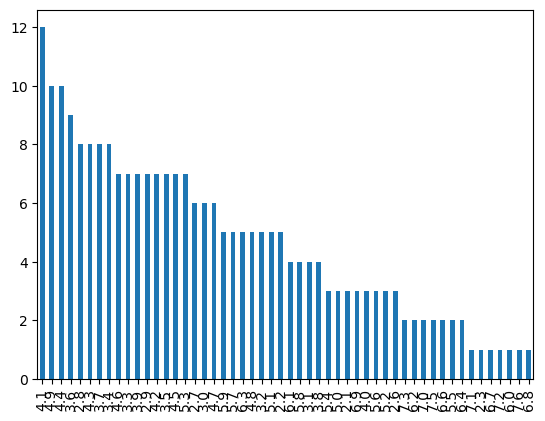

In [15]:
X['Corrosion rate'].value_counts()
X['Corrosion rate'].value_counts().plot.bar()

In [16]:
#Fill missing values of corrosion inhibitor efficiency
#mean_value=merged['Corrosion Inhibitor efficiency'].mean()
#merged['Corrosion Inhibitor efficiency'].fillna(value=mean_value, inplace=True)

# Outlier Detection

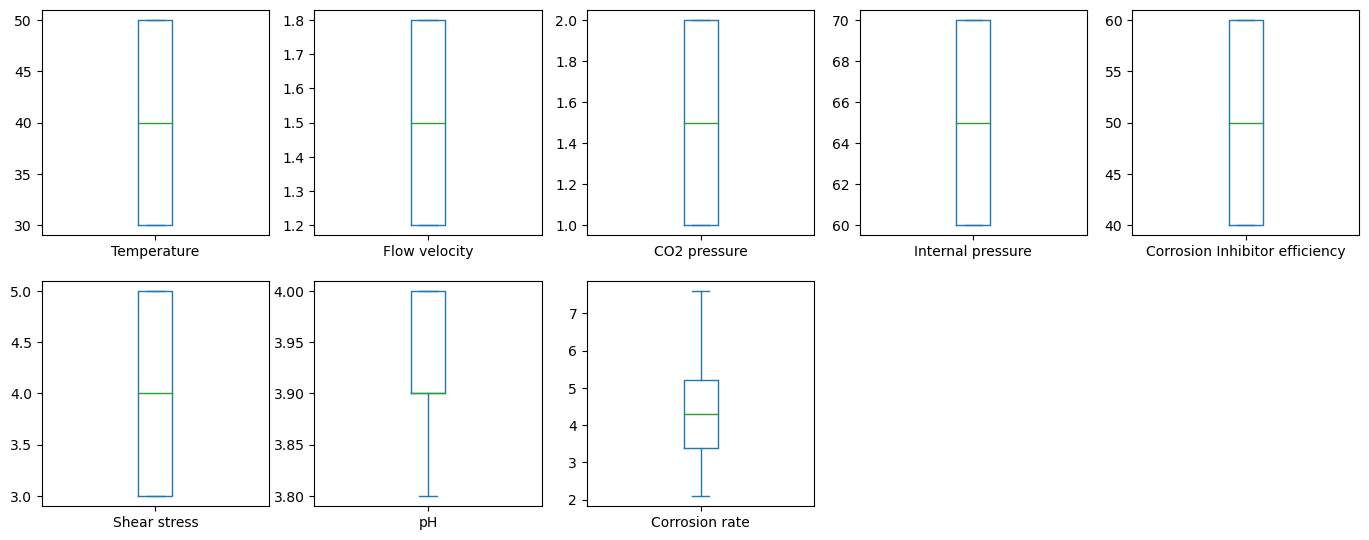

In [17]:
#Visualization of original dataset for comparison before outlier removal
X.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(17,17))
plt.show()

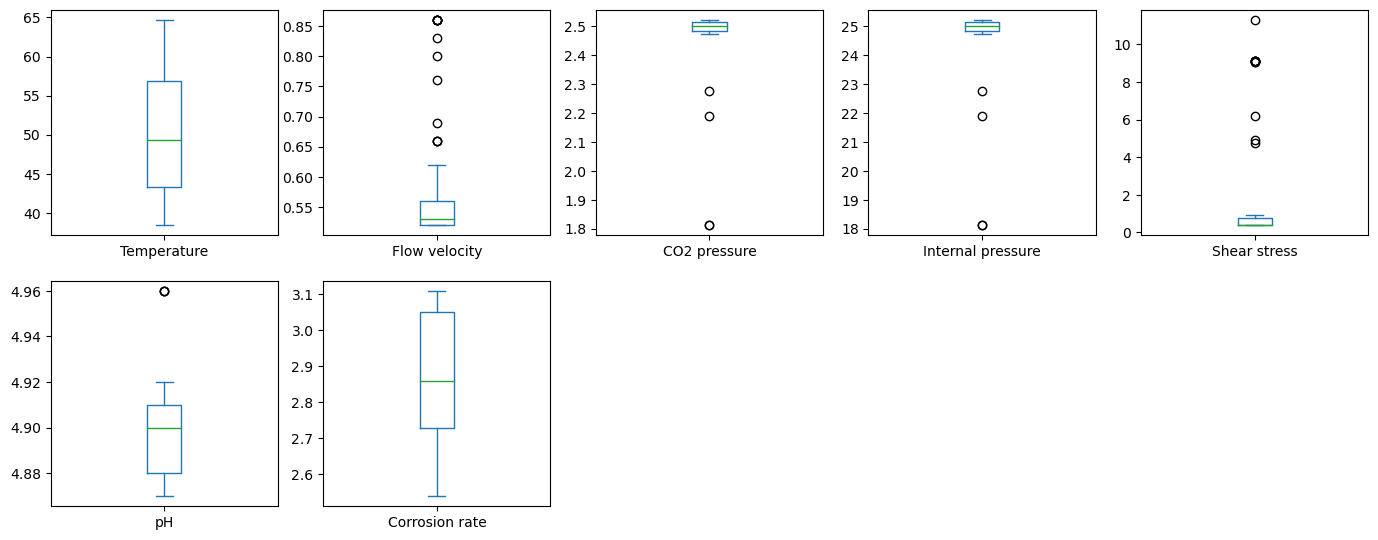

In [18]:
X_china.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(17,17))
plt.show()

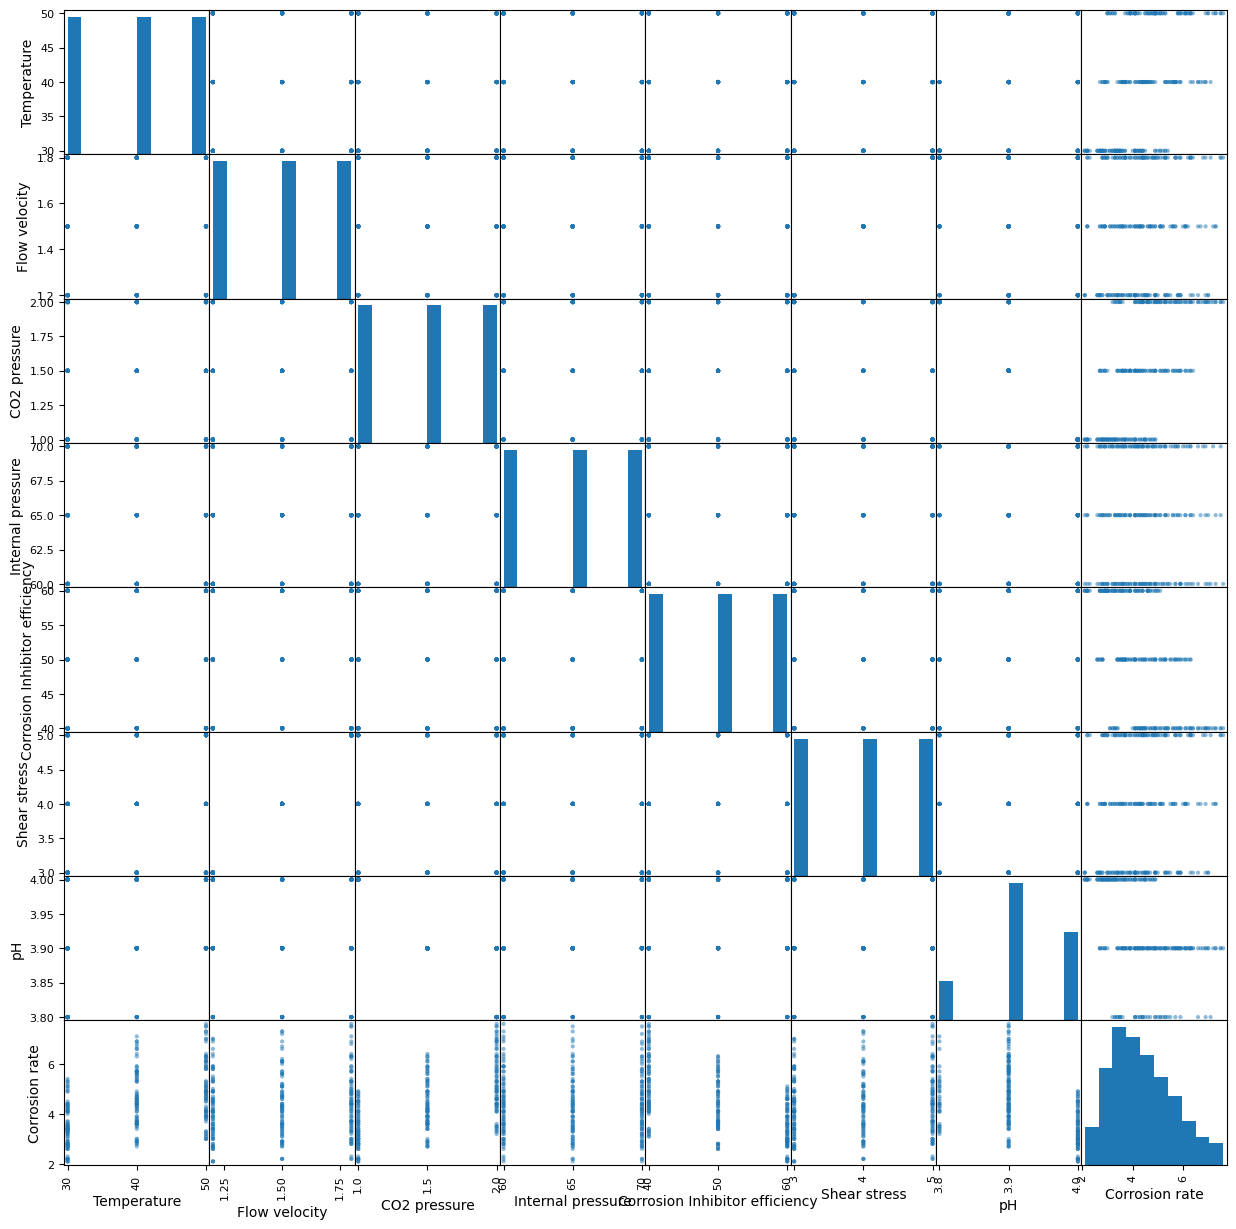

In [19]:
scatter_matrix(X,figsize=(15,15))
plt.show()

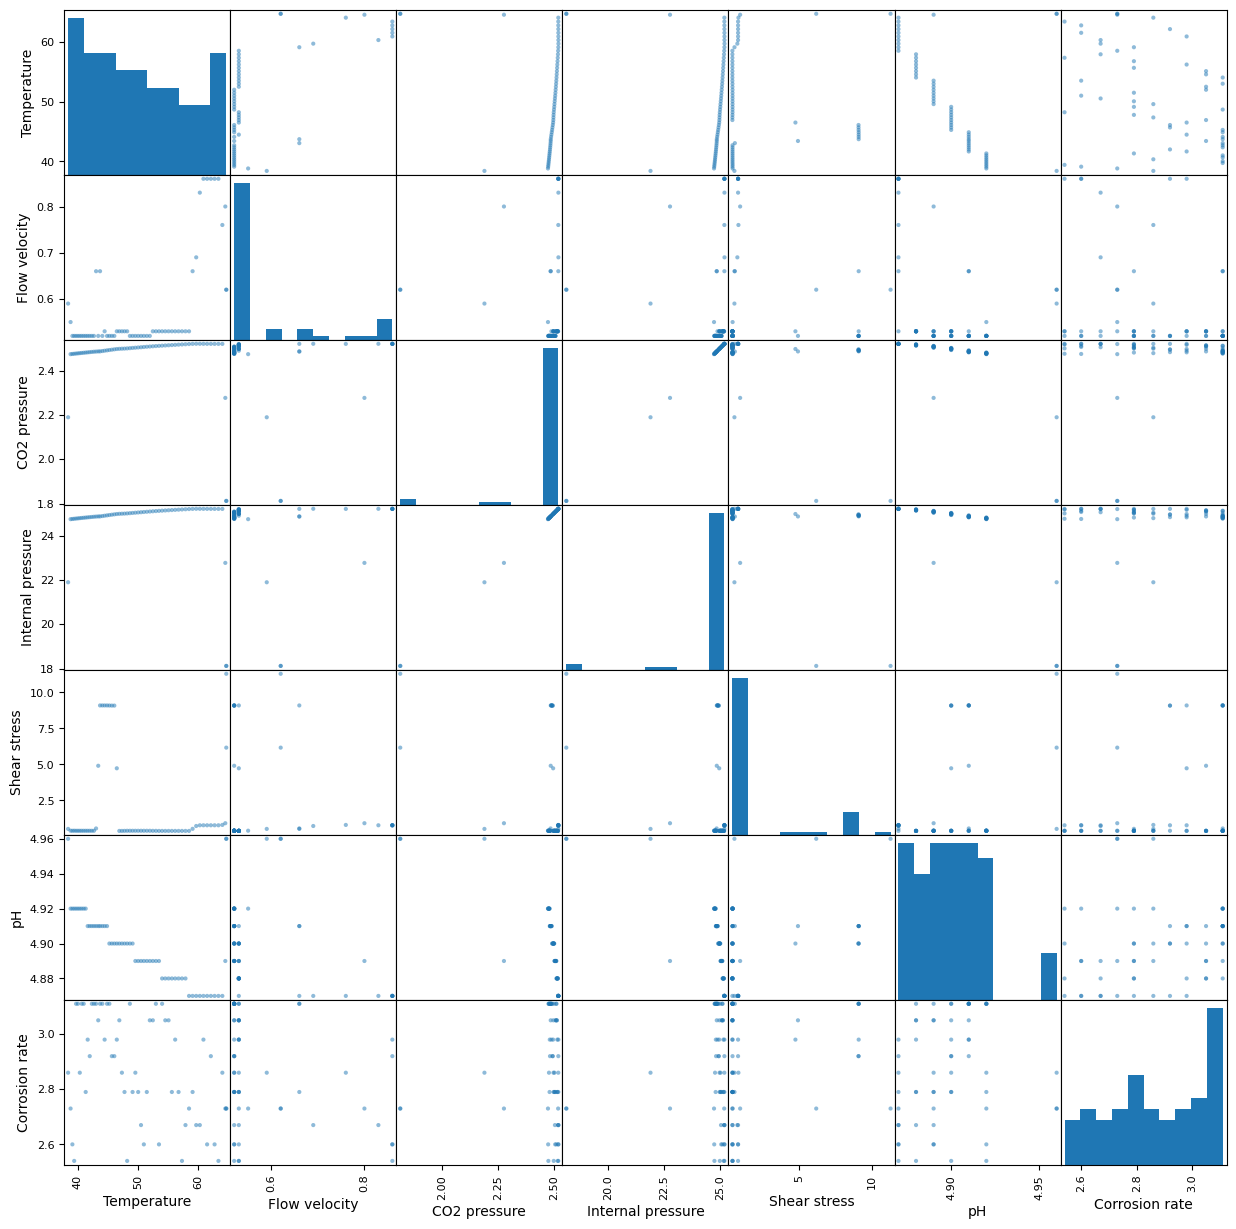

In [20]:
scatter_matrix(X_china,figsize=(15,15))
plt.show()

In [21]:
#Remove outliers for Dataset without Corrison inhibitor (Experiment)
def detect_outlier(X_china):
    List_outliers = []
    threshold=3
    mean = X_china.mean()
    std = X_china.std()
    for y in range(0, len(X_china.columns)):
        outliers = 0
        for x in range(0, len(X_china.index)):
            z_score= (X_china.iloc[x,y] - mean[y])/std[y] 
            if abs(z_score) > threshold:
                outliers += 1
                List_outliers.append(X_china.columns[y])
        print("\n Column ", y, " has",outliers,"outliers")
    List_outliers = set(List_outliers)
    print("\nThe columns with outliers are as follows: \n", List_outliers)
    return outliers  
outliers = detect_outlier(X_china)


 Column  0  has 0 outliers

 Column  1  has 0 outliers

 Column  2  has 2 outliers

 Column  3  has 2 outliers

 Column  4  has 0 outliers

 Column  5  has 0 outliers

 Column  6  has 0 outliers

The columns with outliers are as follows: 
 {'CO2 pressure', 'Internal pressure'}


In [22]:
def detect_outlier(X):
    List_outliers = []
    threshold=3
    mean = X.mean()
    std = X.std()
    for y in range(0, len(X.columns)):
        outliers = 0
        for x in range(0, len(X.index)):
            z_score= (X.iloc[x,y] - mean[y])/std[y] 
            if abs(z_score) > threshold:
                outliers += 1
                List_outliers.append(X.columns[y])
        print("\n Column ", y, " has",outliers,"outliers")
    List_outliers = set(List_outliers)
    print("\nThe columns with outliers are as follows: \n", List_outliers)
    return outliers  
outliers_X = detect_outlier(X)


 Column  0  has 0 outliers

 Column  1  has 0 outliers

 Column  2  has 0 outliers

 Column  3  has 0 outliers

 Column  4  has 0 outliers

 Column  5  has 0 outliers

 Column  6  has 0 outliers

 Column  7  has 0 outliers

The columns with outliers are as follows: 
 set()


In [23]:
#threshold= 3
#List_outliers =[]
#mean= merged.mean()
#std = merged.std()
#for j in range(0, len(merged.columns)):
#        outliers = 0
#        for i in range(0, len(merged.index)):
 #           z_score= (merged.iloc[i,j] - mean[j])/std[j] 
 #           if abs(z_score) > threshold:
 #               outliers += 1
 #               List_outliers.append(i)
#List_outliers = set(List_outliers)
#clean_data = merged.drop(index=List_outliers, axis=1)

In [24]:
#List_outliers

In [25]:
#Using z_score to detect and remove outliers
from scipy import stats
threshold = 3
z = np.abs(stats.zscore(X_china))
Z3_indexes = np.where(z>3); 
#print((df[[1,2,3,4,5]]==0 )II (df[[1]]==99999)).sum ()
for i in range (0,8):
    print ('Column',i,'has total outliers = ')  
    print((Z3_indexes[1]==i).sum())
    
clean_data = X_china[(z<3).all(axis=1)]

Column 0 has total outliers = 
0
Column 1 has total outliers = 
0
Column 2 has total outliers = 
2
Column 3 has total outliers = 
2
Column 4 has total outliers = 
1
Column 5 has total outliers = 
0
Column 6 has total outliers = 
0
Column 7 has total outliers = 
0


In [26]:
clean_data.shape

(58, 7)

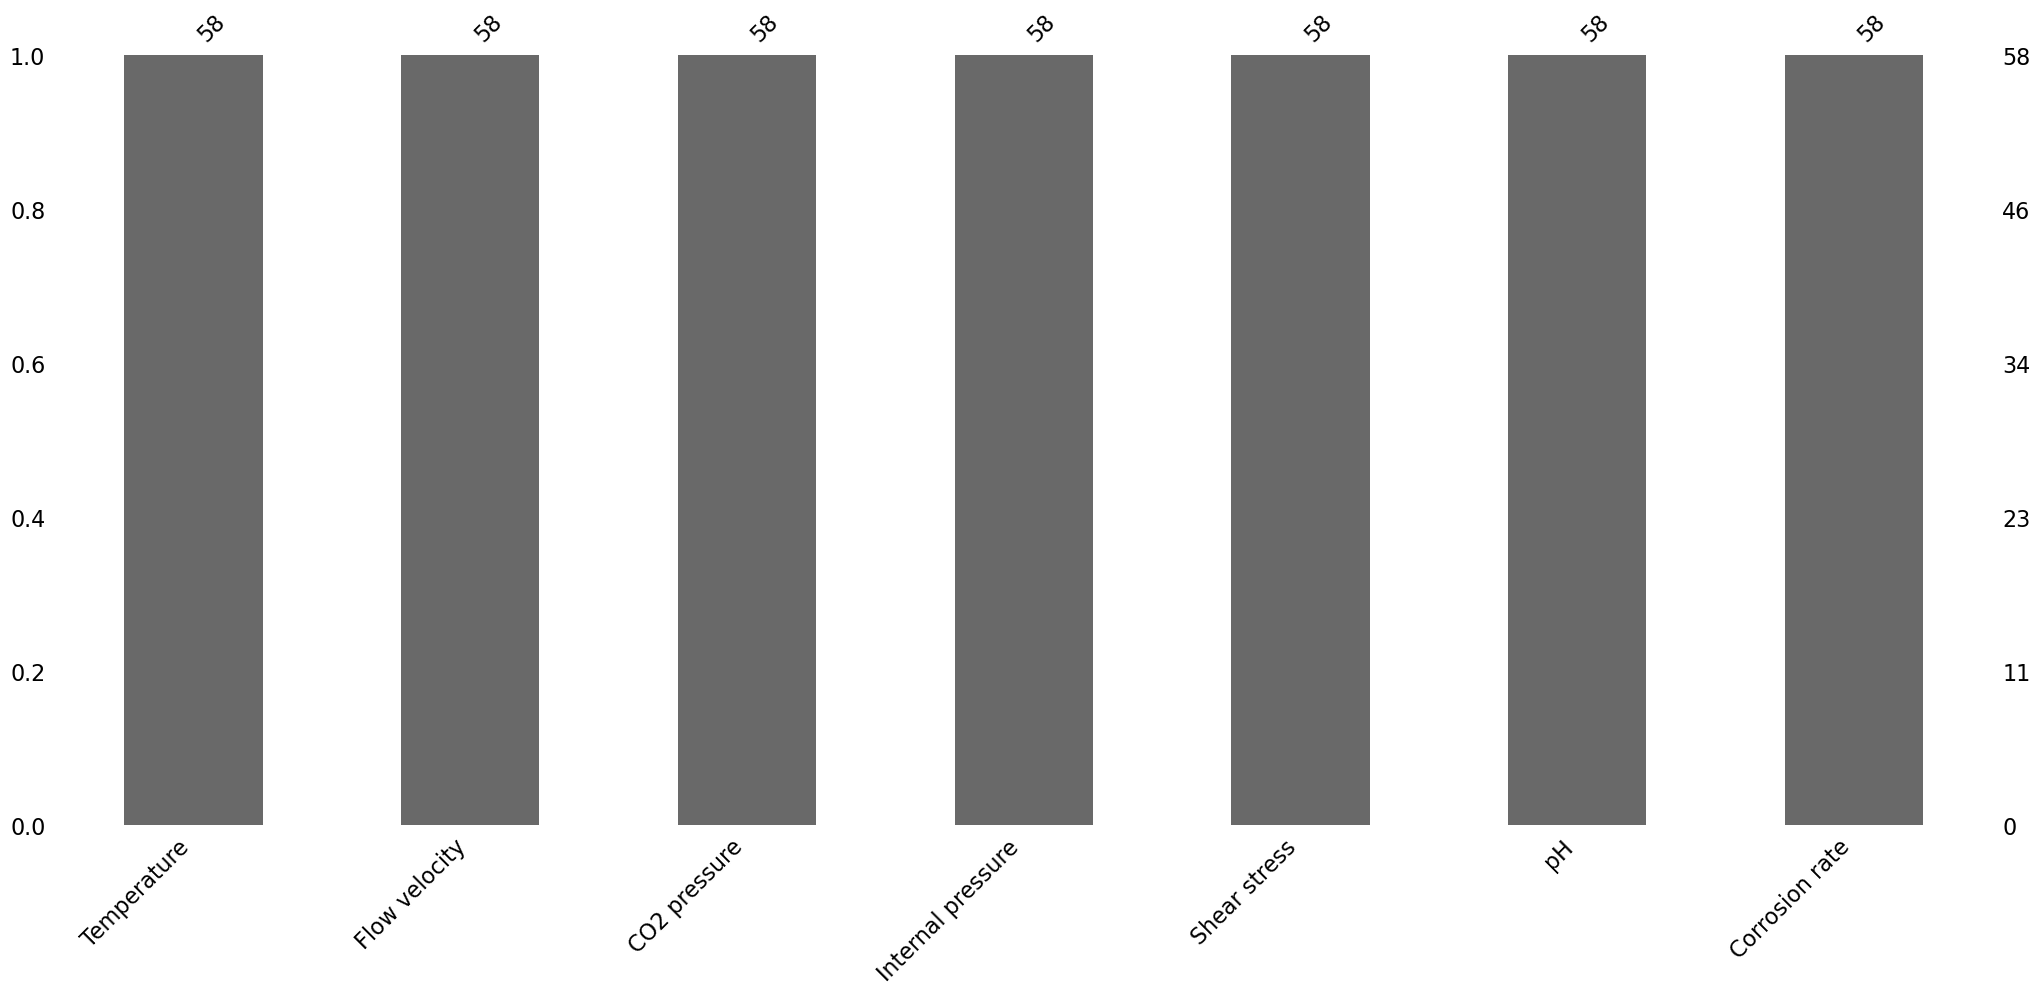

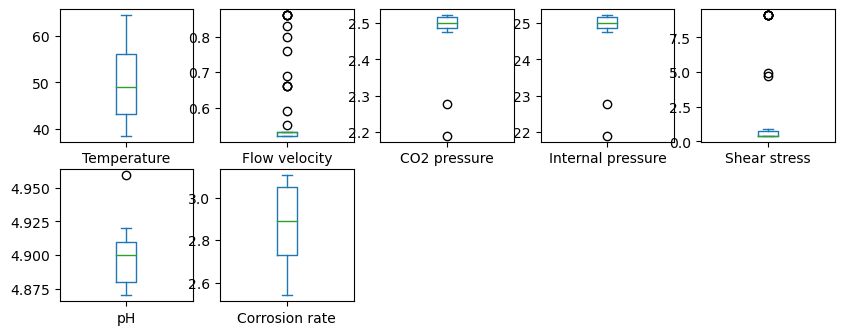

In [27]:
#check no missing values and outliers removed
msno.bar(clean_data)
plt.show()

clean_data.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False, figsize =(10,10))
plt.show()

C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

<AxesSubplot:xlabel='pH', ylabel='Density'>

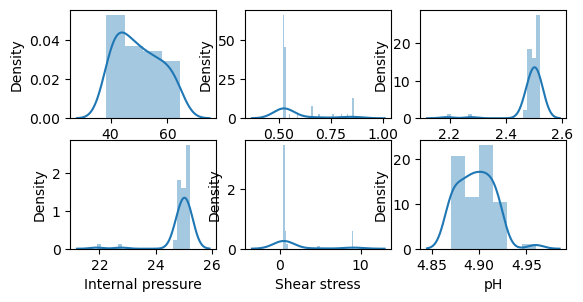

In [28]:
plt.figure(1)
plt.subplot(331)
sns.distplot(clean_data['Temperature'])

plt.subplot(332)
sns.distplot(clean_data['Flow velocity'])

plt.subplot(333)
sns.distplot(clean_data['CO2 pressure'])

plt.subplot(334)
sns.distplot(clean_data['Internal pressure'])

plt.subplot(335)
sns.distplot(clean_data['Shear stress'])

plt.subplot(336)
sns.distplot(clean_data['pH'])

C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

<AxesSubplot:xlabel='pH', ylabel='Density'>

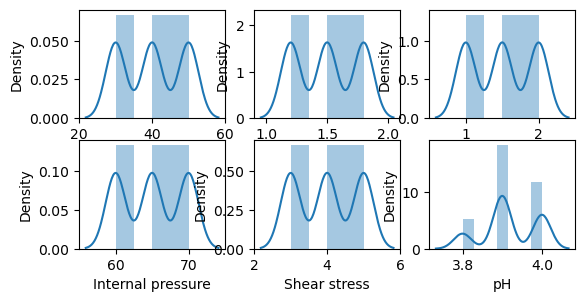

In [42]:
plt.figure(1)
plt.subplot(331)
sns.distplot(X['Temperature'])
plt.subplot(332)
sns.distplot(X['Flow velocity'])

plt.subplot(333)
sns.distplot(X['CO2 pressure'])

plt.subplot(334)
sns.distplot(X['Internal pressure'])

plt.subplot(335)
sns.distplot(X['Shear stress'])

plt.subplot(336)
sns.distplot(X['pH'])

In [30]:
X.corr()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Corrosion Inhibitor efficiency,Shear stress,pH,Corrosion rate
Temperature,1.000000e+00,1.220788e-15,-5.219419e-16,-1.293451e-14,-3.473764e-16,3.377271e-16,2.034970e-01,0.493573
Flow velocity,1.220788e-15,1.000000e+00,-1.541976e-16,-3.454027e-15,-1.142205e-16,1.000000e+00,2.955923e-15,0.107054
CO2 pressure,-5.219419e-16,-1.541976e-16,1.000000e+00,-1.632713e-15,-2.193033e-18,-1.329526e-16,-8.818205e-01,0.614260
Internal pressure,-1.293451e-14,-3.454027e-15,-1.632713e-15,1.000000e+00,-1.929869e-16,-3.449641e-15,6.783234e-02,-0.031274
Corrosion Inhibitor efficiency,-3.473764e-16,-1.142205e-16,-2.193033e-18,-1.929869e-16,1.000000e+00,-1.348715e-16,4.790491e-17,-0.568551
Shear stress,3.377271e-16,1.000000e+00,-1.329526e-16,-3.449641e-15,-1.348715e-16,1.000000e+00,2.763423e-15,0.107054
pH,2.034970e-01,2.955923e-15,-8.818205e-01,6.783234e-02,4.790491e-17,2.763423e-15,1.000000e+00,-0.428815
Corrosion rate,4.935728e-01,1.070544e-01,6.142596e-01,-3.127431e-02,-5.685510e-01,1.070544e-01,-4.288149e-01,1.000000


In [31]:
clean_data.corr()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Shear stress,pH,Corrosion rate
Temperature,1.000000,0.654223,0.283431,0.283432,-0.237156,-0.928948,-0.391567
Flow velocity,0.654223,1.000000,-0.016727,-0.016739,-0.100746,-0.507898,-0.296071
CO2 pressure,0.283431,-0.016727,1.000000,1.000000,-0.008975,-0.583571,-0.034951
Internal pressure,0.283432,-0.016739,1.000000,1.000000,-0.009063,-0.583578,-0.034930
Shear stress,-0.237156,-0.100746,-0.008975,-0.009063,1.000000,0.186463,0.320496
pH,-0.928948,-0.507898,-0.583571,-0.583578,0.186463,1.000000,0.322162
Corrosion rate,-0.391567,-0.296071,-0.034951,-0.034930,0.320496,0.322162,1.000000


<Figure size 640x480 with 0 Axes>

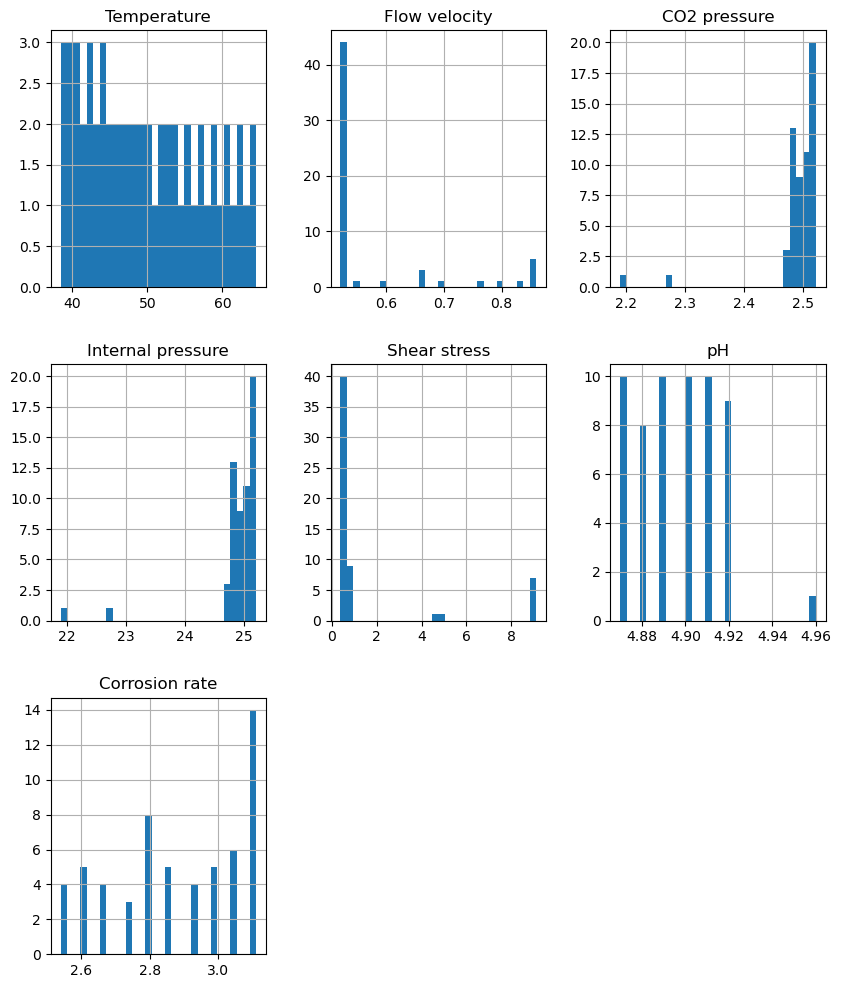

In [32]:
plt.tight_layout()
clean_data.hist(bins = 30, figsize = (10,12))
plt.show()

<Figure size 640x480 with 0 Axes>

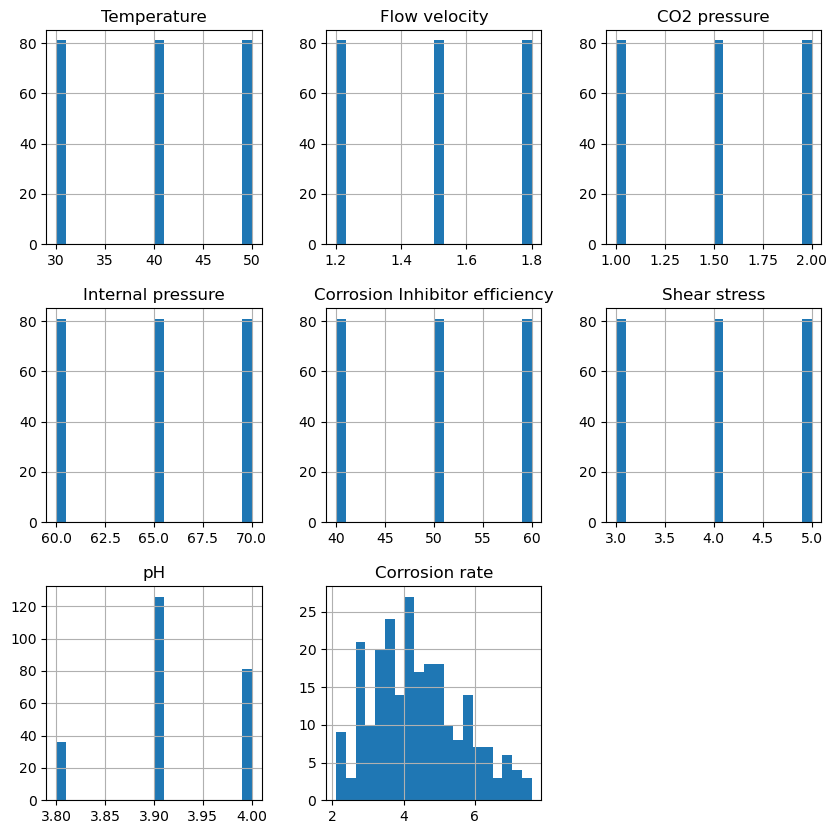

In [33]:
plt.tight_layout()
X.hist(bins = 20, figsize = (10,10))
plt.show()

In [34]:
#Data Visualization
ave_qu = clean_data.groupby("Corrosion rate").mean()
ave_qu.head()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Shear stress,pH
Corrosion rate,,,,,,
2.54,52.085000,0.610000,2.503750,25.037350,0.489125,4.892500
2.60,53.568000,0.658000,2.506980,25.069820,0.545600,4.888000
2.67,57.095000,0.642500,2.516650,25.166575,0.570875,4.877500
2.73,53.943333,0.626667,2.423733,24.237267,0.568333,4.893333
2.79,51.405000,0.541250,2.506088,25.060825,0.408750,4.891250


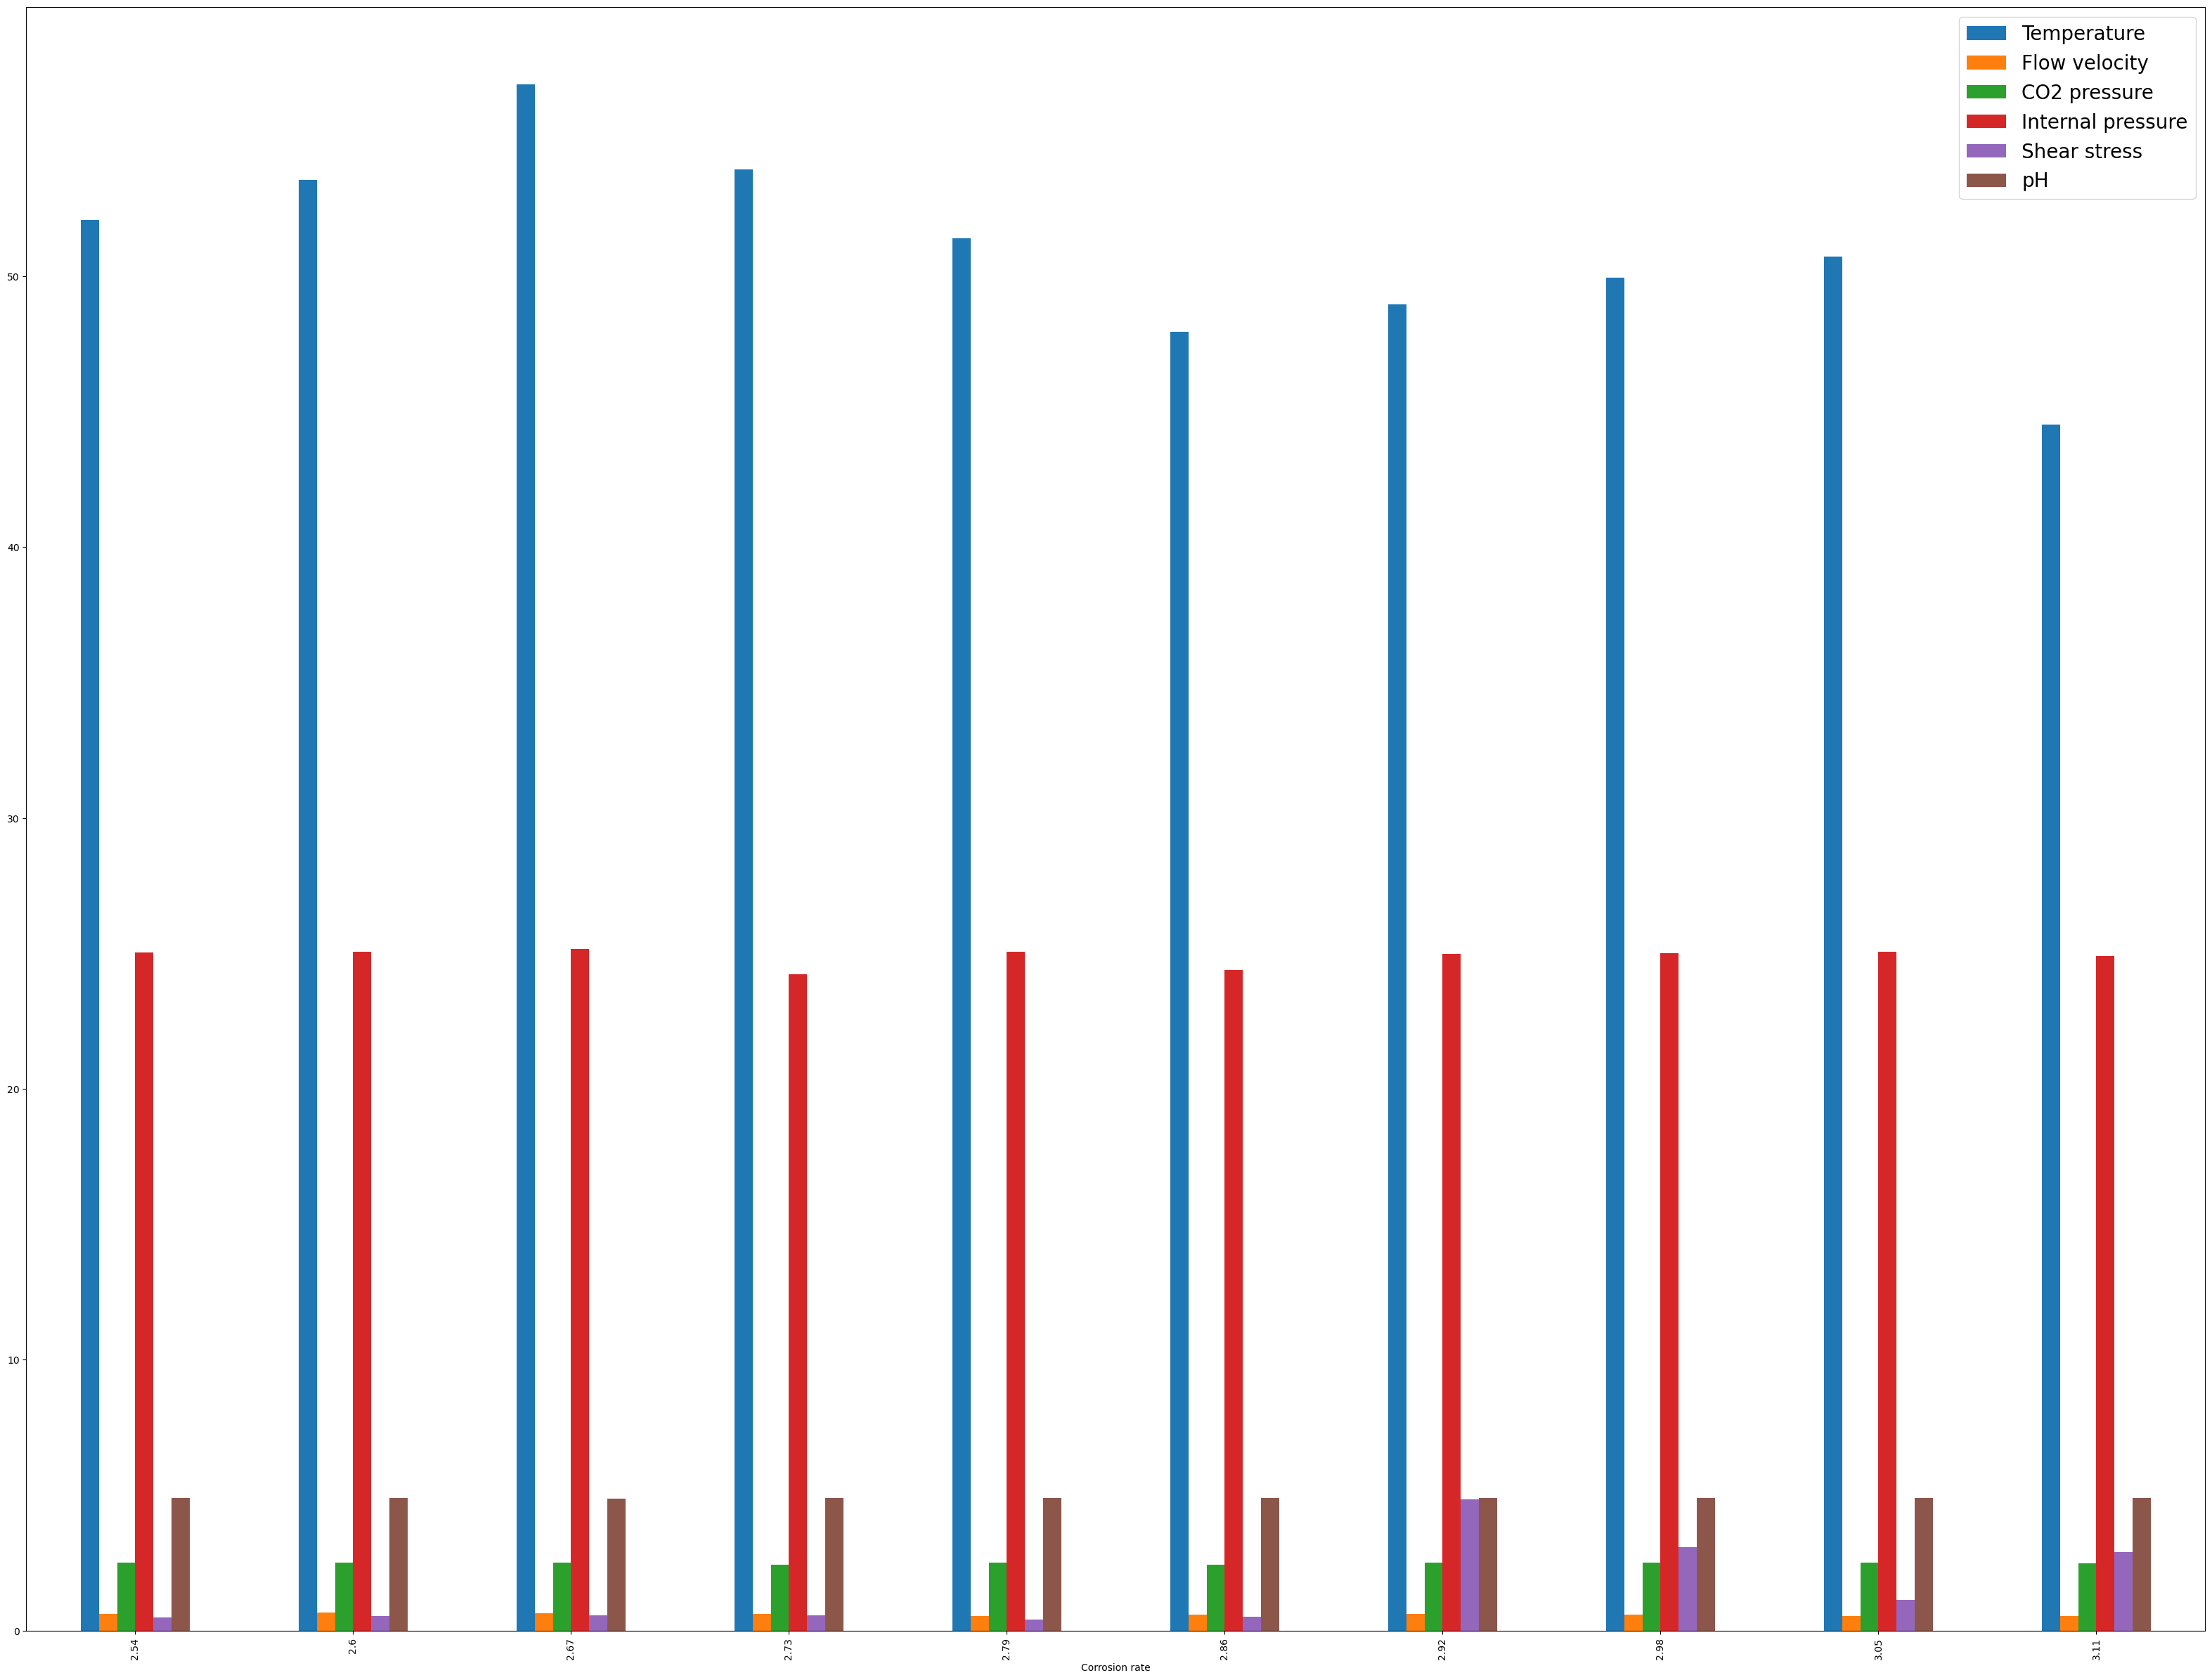

In [35]:
ave_qu.plot(kind="bar",figsize=(40,30))
plt.legend(fontsize=20)

In [36]:
ave_qu_X = X.groupby("Corrosion rate").mean()
ave_qu_X.head()

,Temperature,Flow velocity,CO2 pressure,Internal pressure,Corrosion Inhibitor efficiency,Shear stress,pH
Corrosion rate,,,,,,,
2.1,30.000000,1.20,1.00,65.000000,60.000000,3.000000,4.00
2.2,30.000000,1.62,1.00,66.000000,60.000000,4.400000,4.00
2.3,30.000000,1.80,1.00,60.000000,60.000000,5.000000,4.00
2.6,30.000000,1.20,1.00,65.000000,50.000000,3.000000,4.00
2.7,31.666667,1.30,1.25,66.666667,56.666667,3.333333,3.95


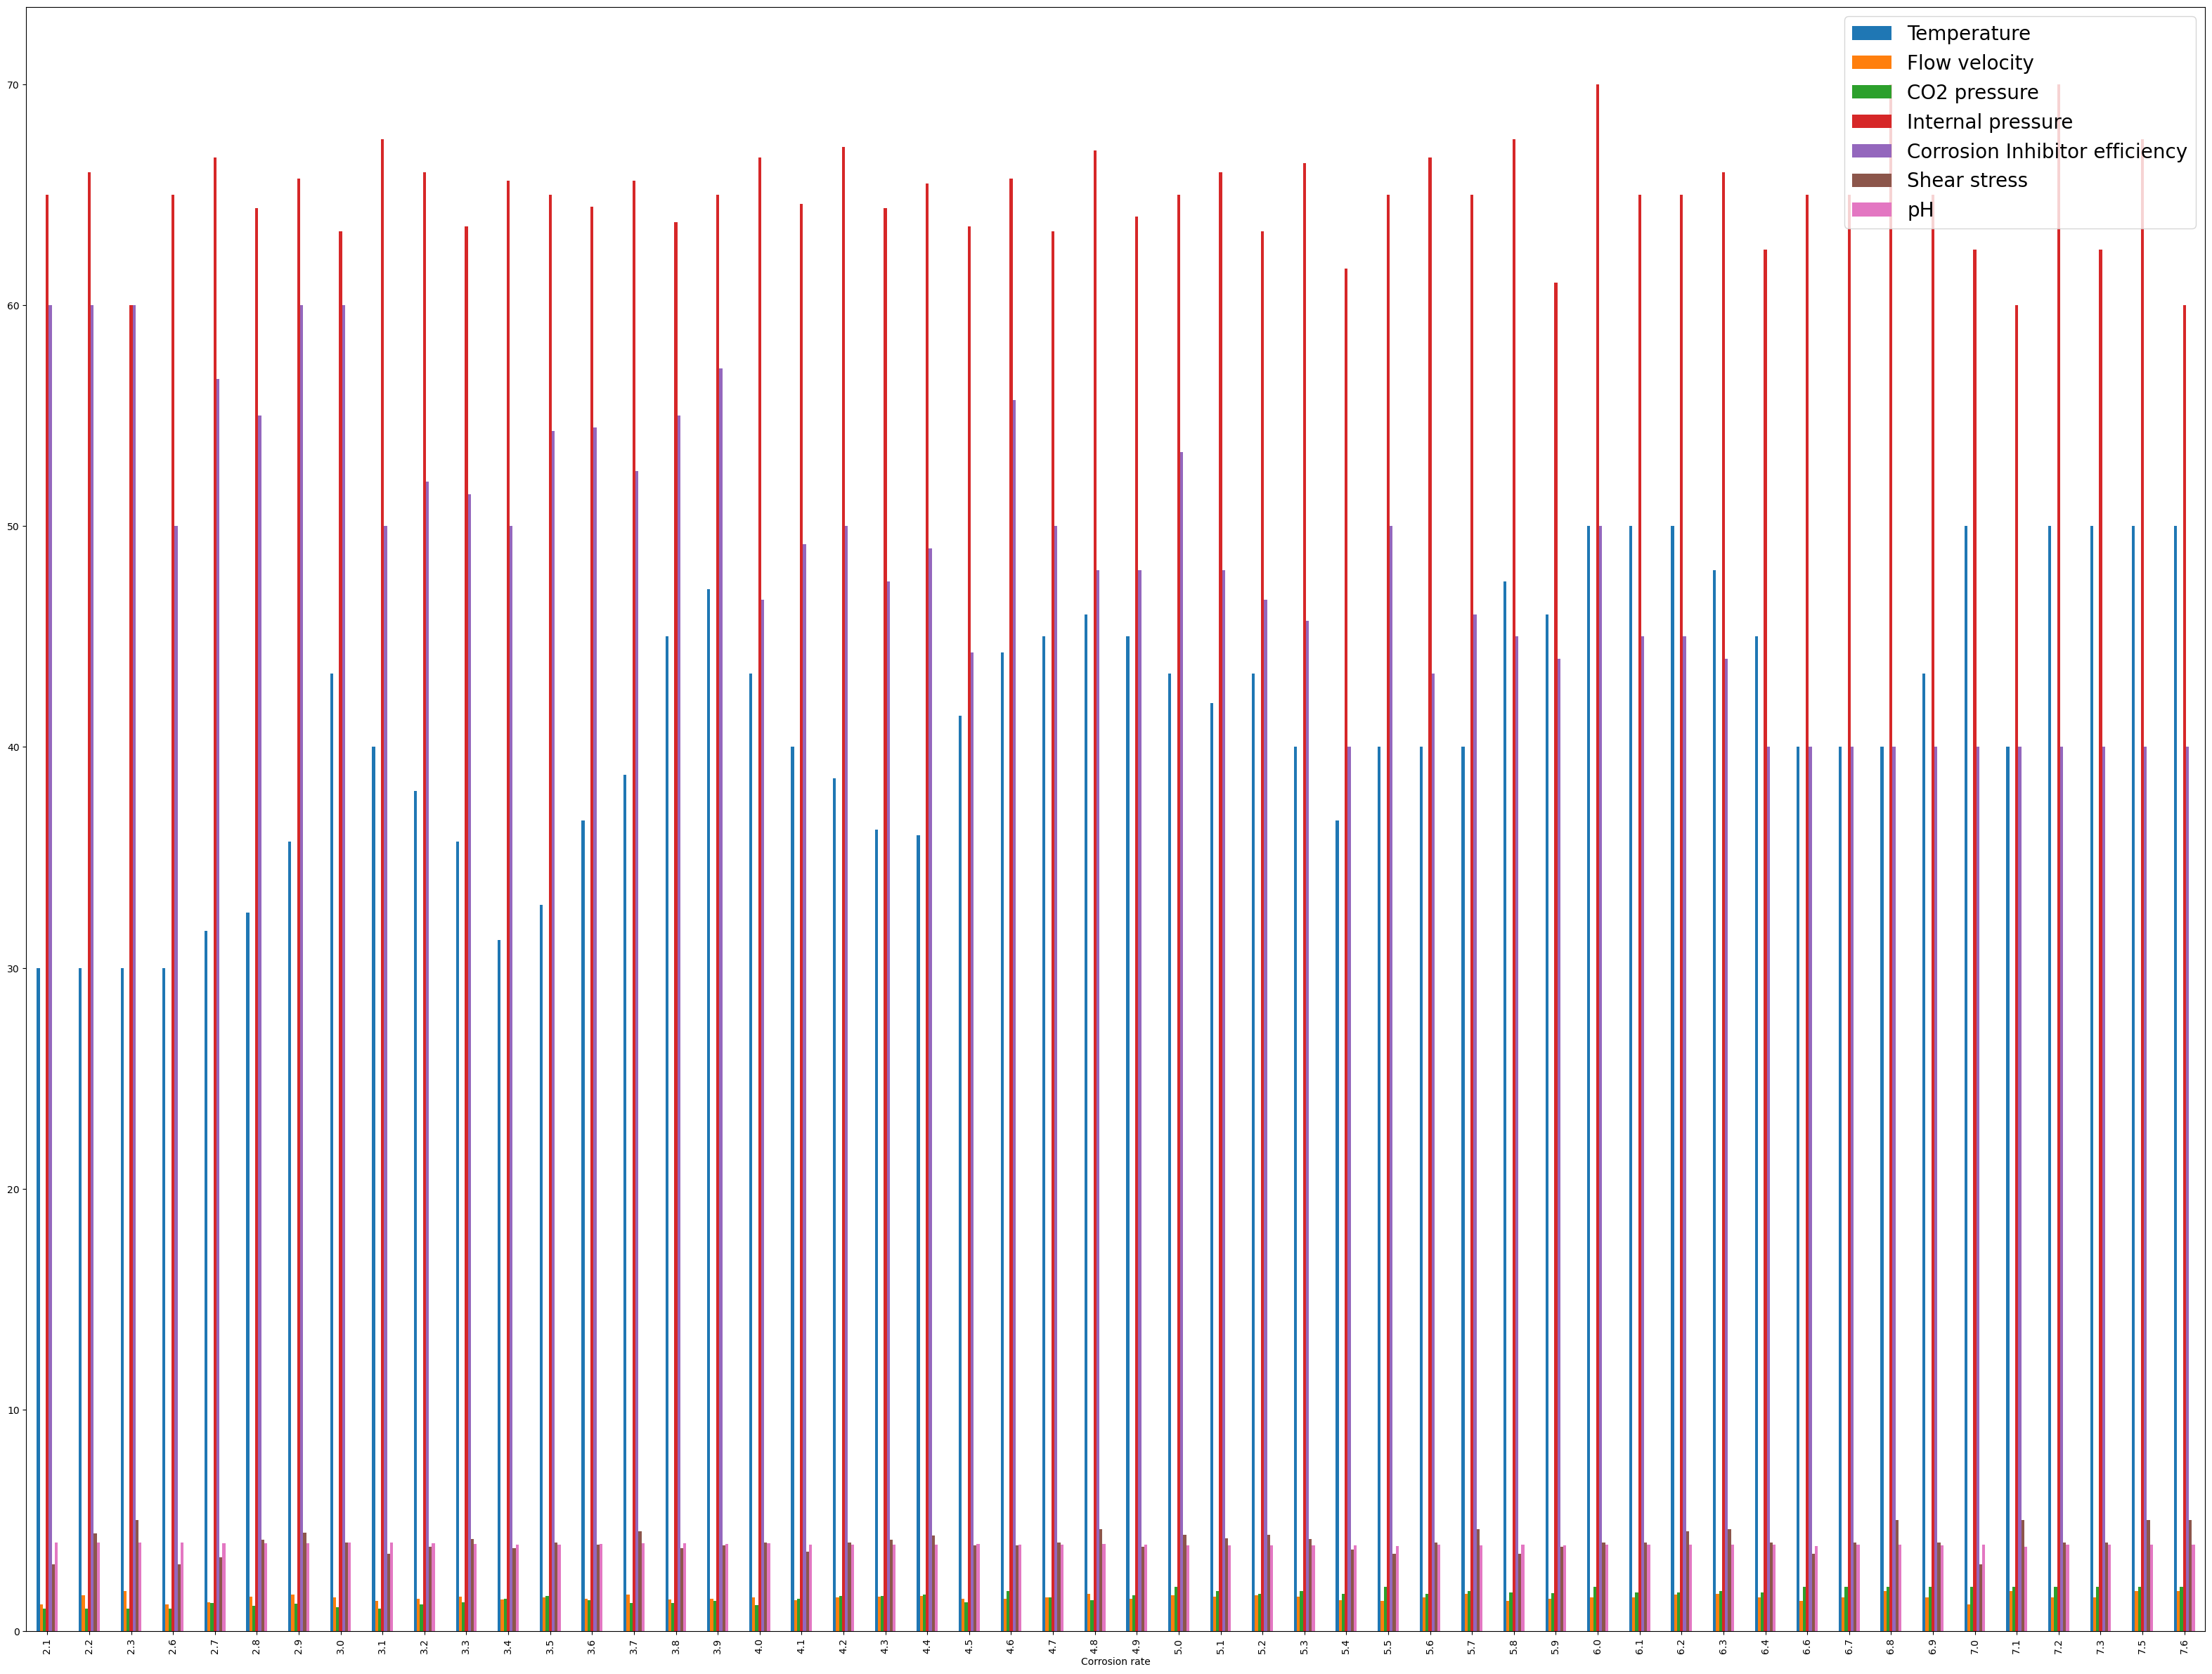

In [37]:
ave_qu_X.plot(kind="bar",figsize=(40,30))
plt.legend(fontsize=20)

<AxesSubplot:>

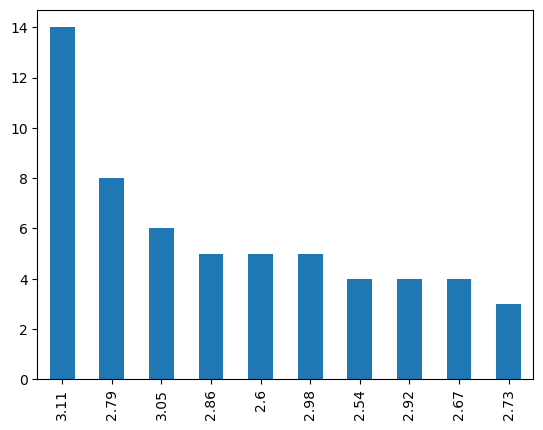

In [38]:
clean_data['Corrosion rate'].value_counts()
clean_data['Corrosion rate'].value_counts().plot.bar()

<AxesSubplot:>

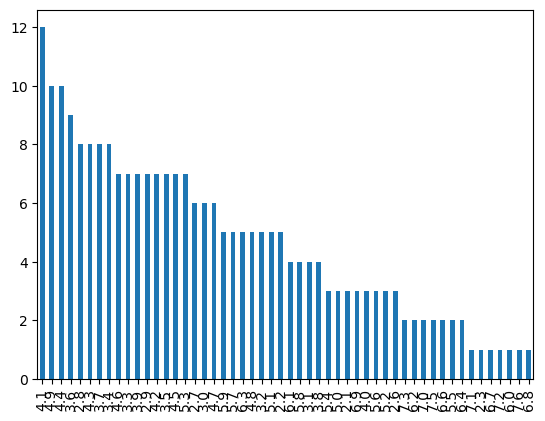

In [39]:
X['Corrosion rate'].value_counts()
X['Corrosion rate'].value_counts().plot.bar()

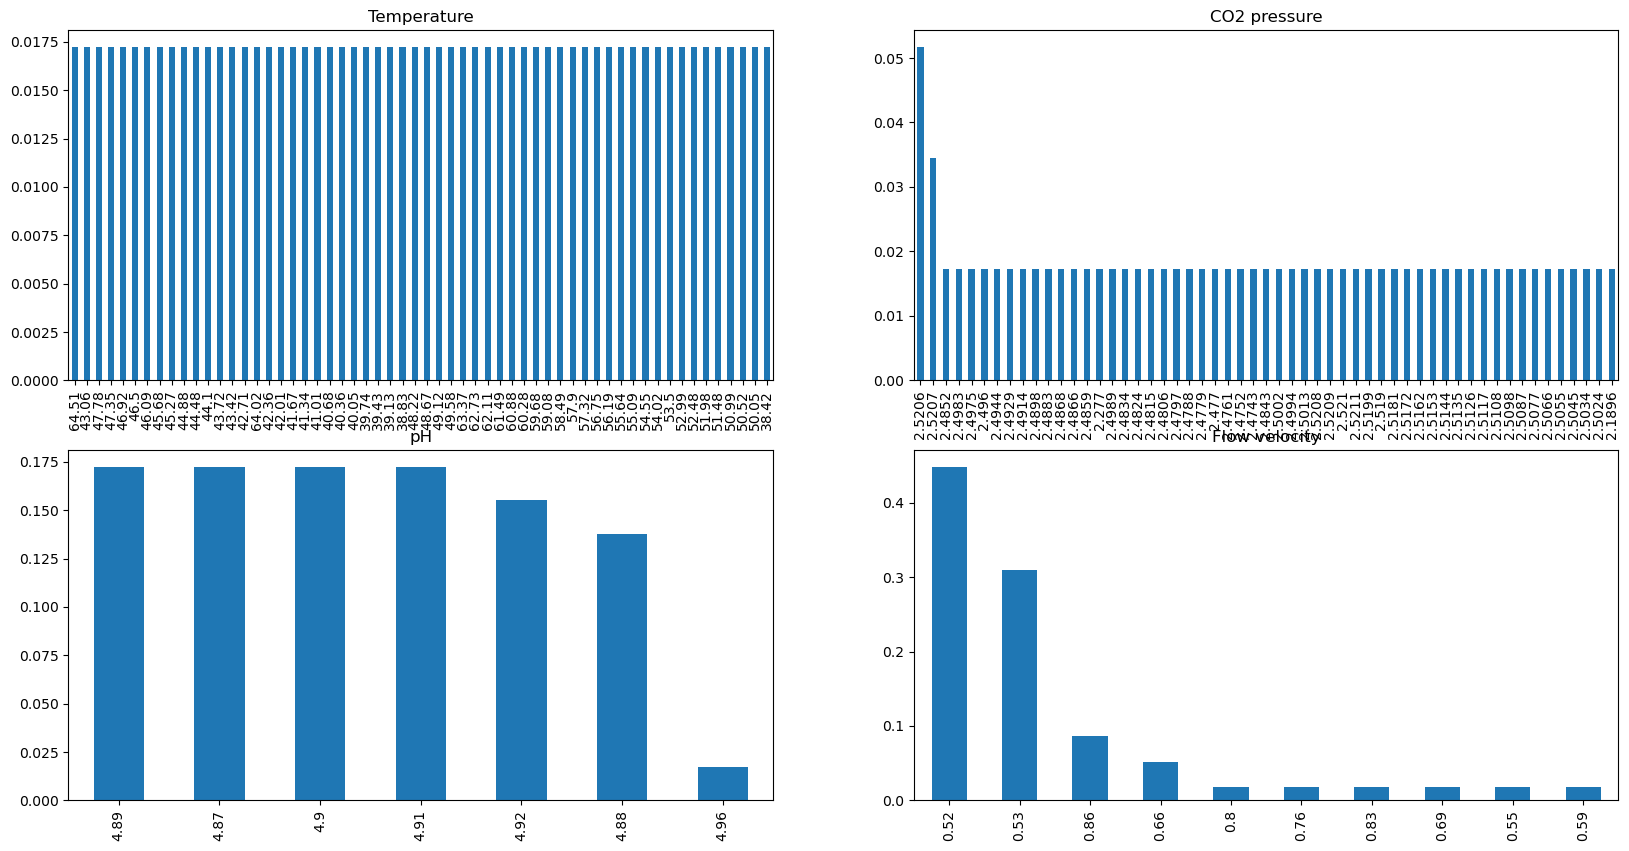

In [40]:
plt.figure(1)
plt.subplot(221)
clean_data['Temperature'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Temperature')

plt.subplot(222)
clean_data['CO2 pressure'].value_counts(normalize=True).plot.bar(title='CO2 pressure')

plt.subplot(223)
clean_data['pH'].value_counts(normalize=True).plot.bar(title='pH')

plt.subplot(224)
clean_data['Flow velocity'].value_counts(normalize=True).plot.bar(title='Flow velocity')

plt.show()

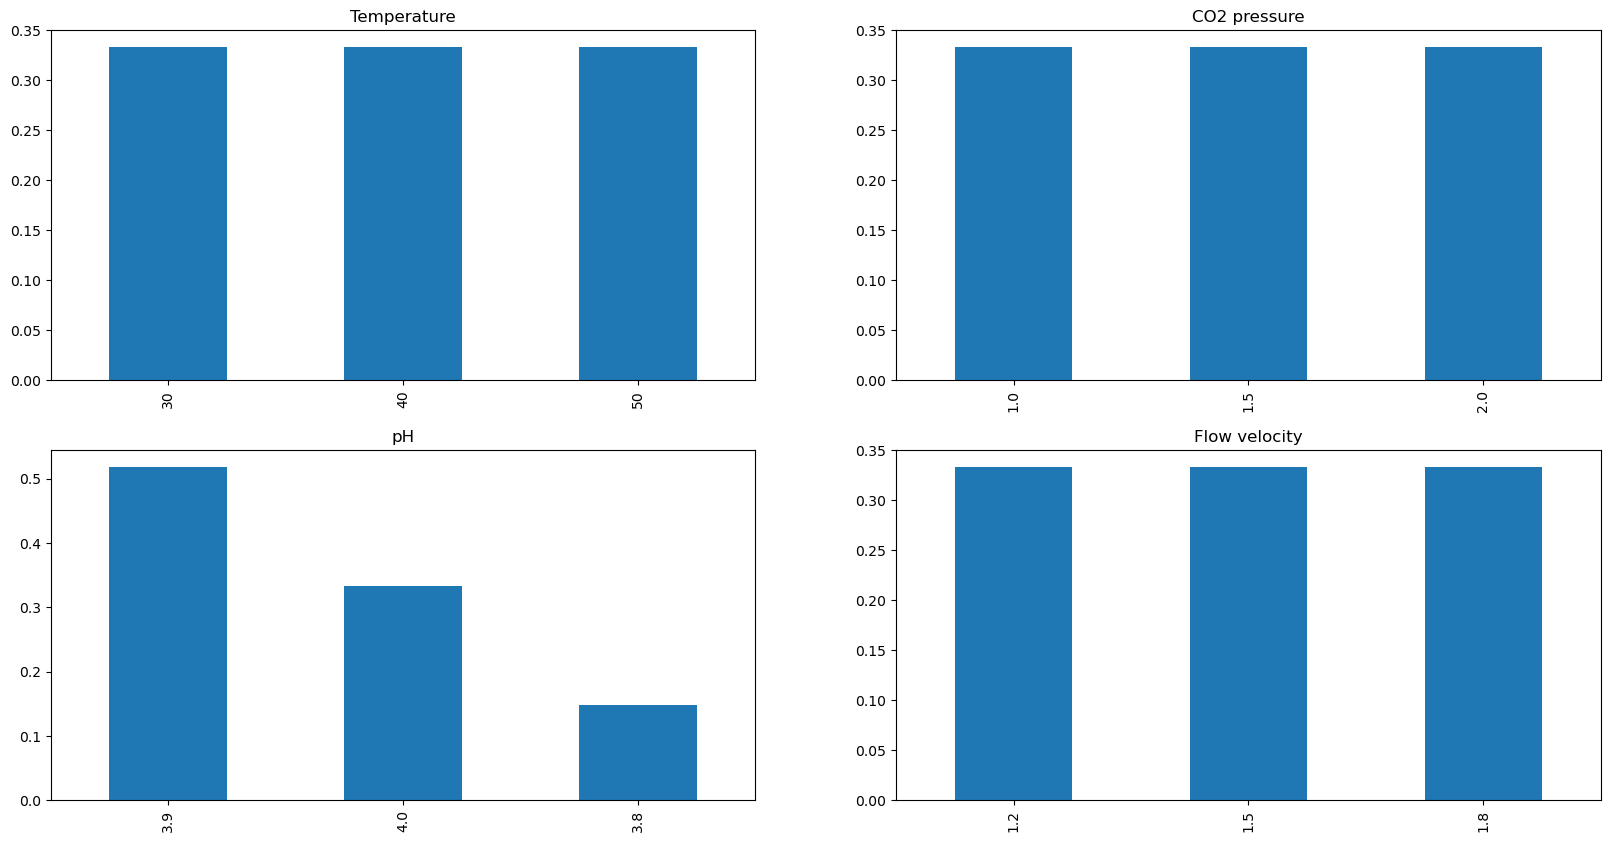

In [43]:
plt.figure(1)
plt.subplot(221)
X['Temperature'].value_counts(normalize=True).plot.bar(figsize=(20,10), title='Temperature')

plt.subplot(222)
X['CO2 pressure'].value_counts(normalize=True).plot.bar(title='CO2 pressure')

plt.subplot(223)
X['pH'].value_counts(normalize=True).plot.bar(title='pH')

plt.subplot(224)
X['Flow velocity'].value_counts(normalize=True).plot.bar(title='Flow velocity')

plt.show()

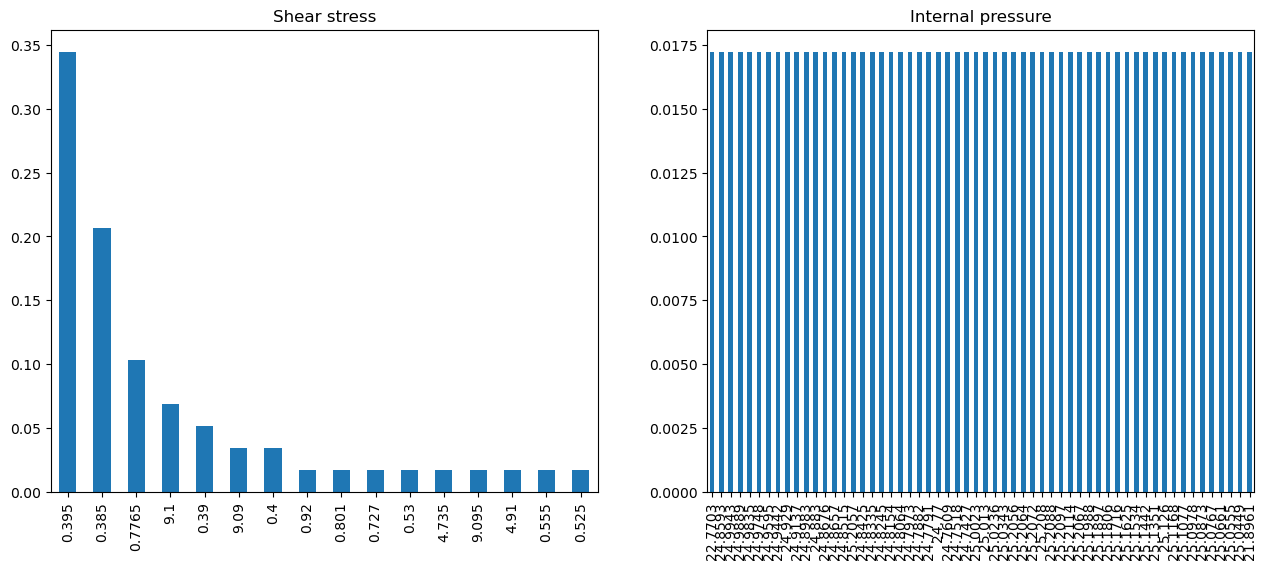

In [45]:
plt.figure(1)
plt.subplot(131)
clean_data['Shear stress'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Shear stress')

plt.subplot(132)
clean_data['Internal pressure'].value_counts(normalize=True).plot.bar(title='Internal pressure')

#plt.subplot(133)
#clean_data['Corrosion Inhibitor efficiency'].value_counts(normalize=True).plot.bar(title='Corrosion Inhibitor efficiency')

plt.show()

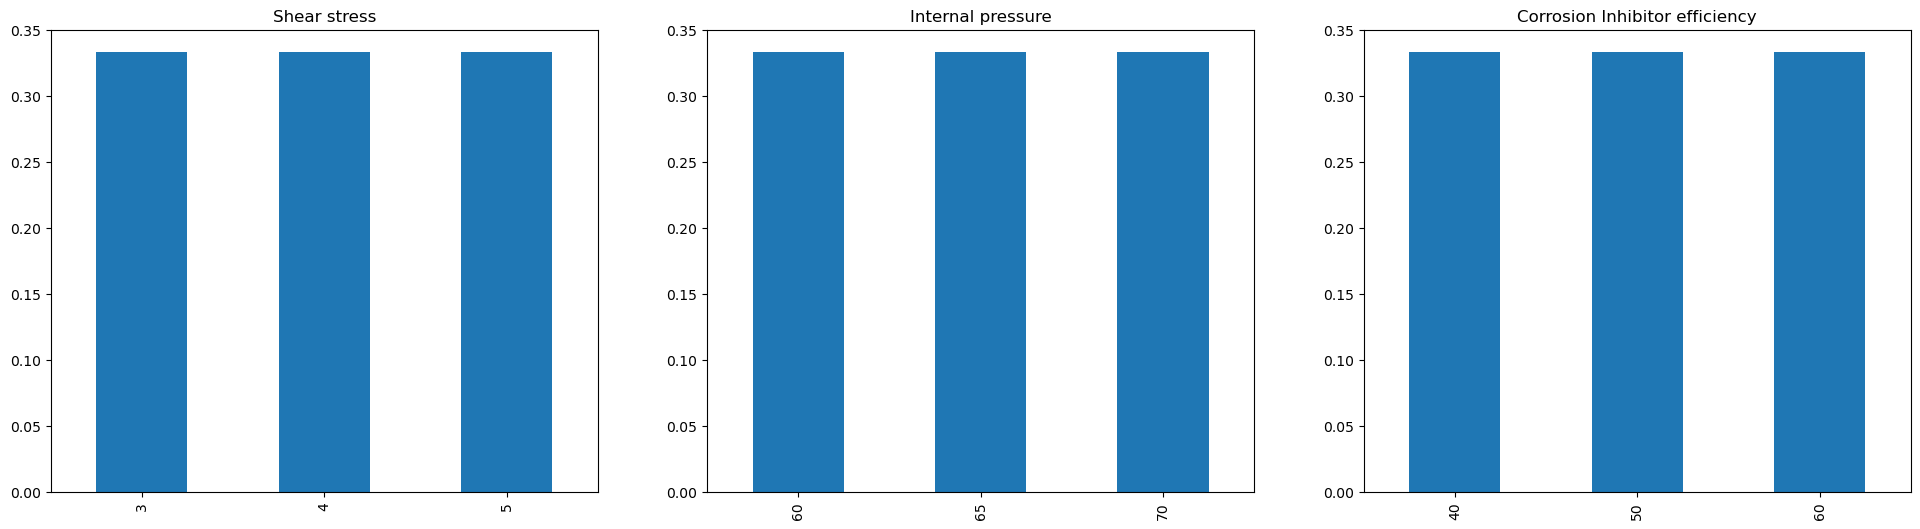

In [46]:
plt.figure(1)
plt.subplot(131)
X['Shear stress'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Shear stress')

plt.subplot(132)
X['Internal pressure'].value_counts(normalize=True).plot.bar(title='Internal pressure')

plt.subplot(133)
X['Corrosion Inhibitor efficiency'].value_counts(normalize=True).plot.bar(title='Corrosion Inhibitor efficiency')

plt.show()

In [47]:
#Correlation
clean_data.corr().sum()

Temperature          0.663414
Flow velocity        0.716042
CO2 pressure         1.639207
Internal pressure    1.639123
Shear stress         1.151019
pH                  -1.095370
Corrosion rate       0.885139
dtype: float64

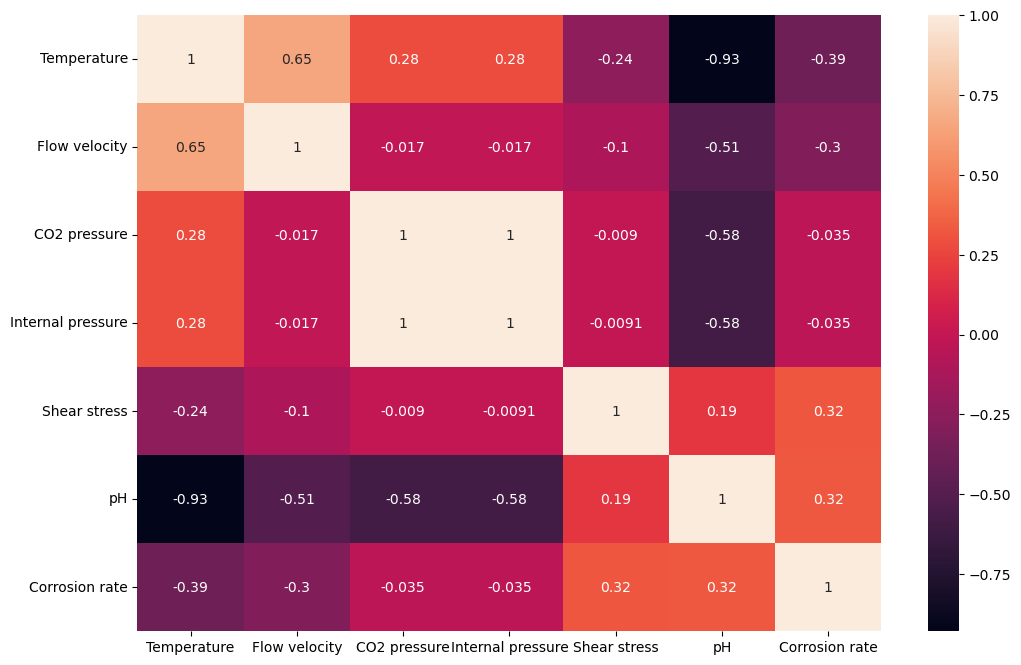

In [48]:
plt.figure(figsize = (12,8))
sns.heatmap(clean_data.corr(), annot = True)
plt.show()

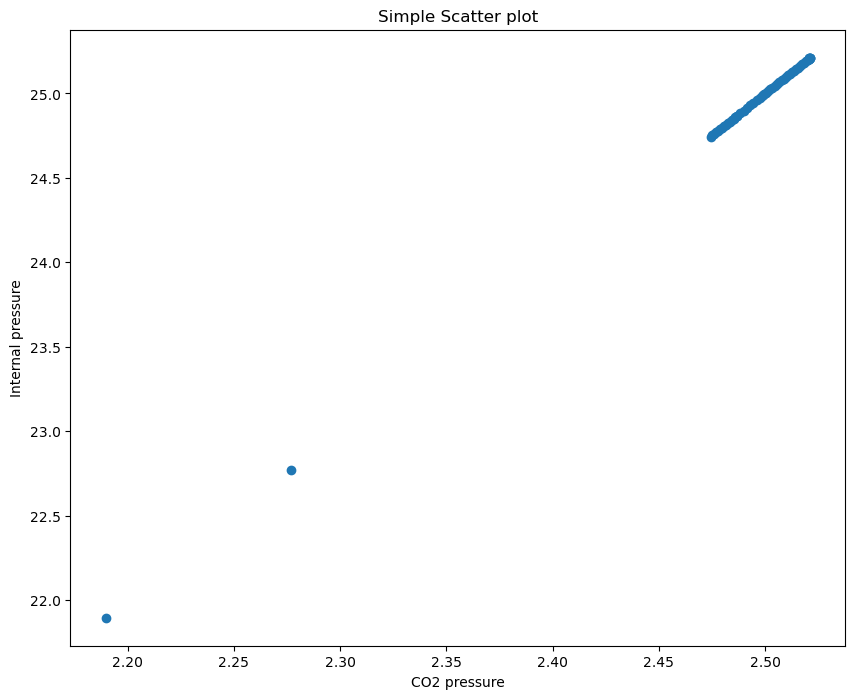

In [50]:
x = clean_data['CO2 pressure']
y = clean_data['Internal pressure']

plt.scatter(x, y)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('CO2 pressure')
plt.ylabel('Internal pressure')
plt.show()

In [51]:
#Correlation
X.corr().sum()

Temperature                       1.697070
Flow velocity                     2.107054
CO2 pressure                      0.732439
Internal pressure                 1.036558
Corrosion Inhibitor efficiency    0.431449
Shear stress                      2.107054
pH                               -0.039306
Corrosion rate                    1.293301
dtype: float64

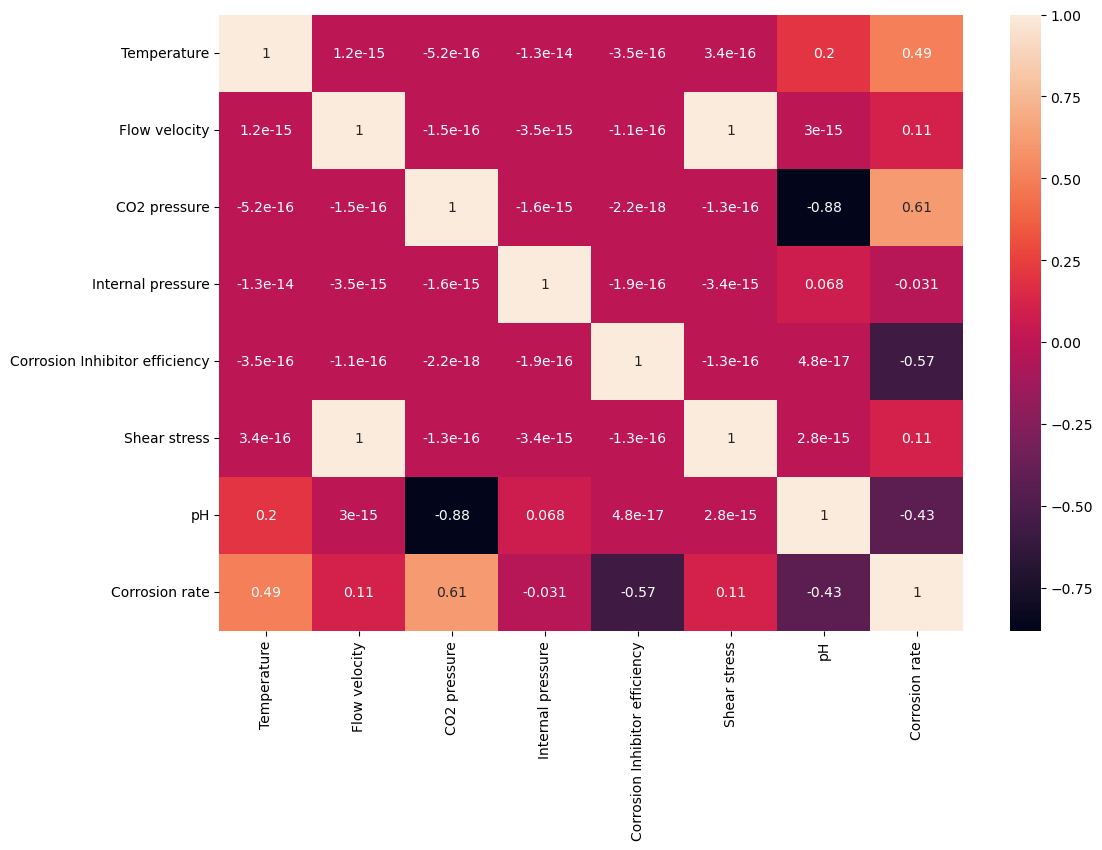

In [52]:
plt.figure(figsize = (12,8))
sns.heatmap(X.corr(), annot = True)
plt.show()

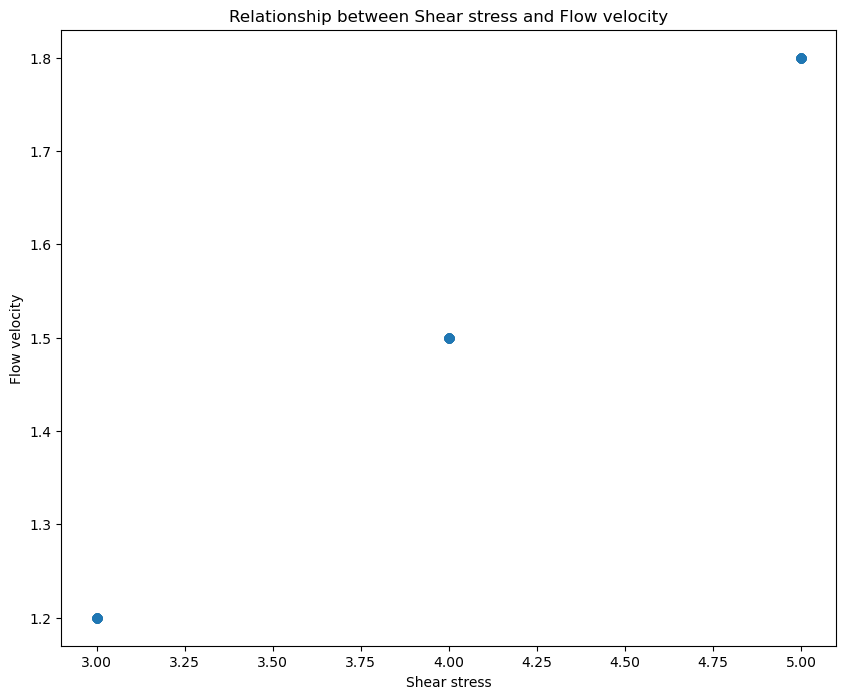

In [126]:
x1 = X['Shear stress']
y1 = X['Flow velocity']

plt.scatter(x1, y1)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Relationship between Shear stress and Flow velocity')
plt.xlabel('Shear stress')
plt.ylabel('Flow velocity')
plt.show()

In [54]:
corr_matrix = X.corr().abs()
print(); print(corr_matrix)


                                 Temperature  Flow velocity  CO2 pressure  \
Temperature                     1.000000e+00   1.220788e-15  5.219419e-16   
Flow velocity                   1.220788e-15   1.000000e+00  1.541976e-16   
CO2 pressure                    5.219419e-16   1.541976e-16  1.000000e+00   
Internal pressure               1.293451e-14   3.454027e-15  1.632713e-15   
Corrosion Inhibitor efficiency  3.473764e-16   1.142205e-16  2.193033e-18   
Shear stress                    3.377271e-16   1.000000e+00  1.329526e-16   
pH                              2.034970e-01   2.955923e-15  8.818205e-01   
Corrosion rate                  4.935728e-01   1.070544e-01  6.142596e-01   

                                Internal pressure  \
Temperature                          1.293451e-14   
Flow velocity                        3.454027e-15   
CO2 pressure                         1.632713e-15   
Internal pressure                    1.000000e+00   
Corrosion Inhibitor efficiency       1.9

In [55]:
corr_matrix1 = clean_data.corr().abs()
print(); print(corr_matrix1)


                   Temperature  Flow velocity  CO2 pressure  \
Temperature           1.000000       0.654223      0.283431   
Flow velocity         0.654223       1.000000      0.016727   
CO2 pressure          0.283431       0.016727      1.000000   
Internal pressure     0.283432       0.016739      1.000000   
Shear stress          0.237156       0.100746      0.008975   
pH                    0.928948       0.507898      0.583571   
Corrosion rate        0.391567       0.296071      0.034951   

                   Internal pressure  Shear stress        pH  Corrosion rate  
Temperature                 0.283432      0.237156  0.928948        0.391567  
Flow velocity               0.016739      0.100746  0.507898        0.296071  
CO2 pressure                1.000000      0.008975  0.583571        0.034951  
Internal pressure           1.000000      0.009063  0.583578        0.034930  
Shear stress                0.009063      1.000000  0.186463        0.320496  
pH                  

# Statistical Methods of removing Highly correlated values & Feature Selection (VIF)

In [60]:
X_ = X.drop(['Corrosion rate'], axis=1)
y_t = X['Corrosion rate']

In [61]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = X_.columns
vif["vif_Factor"] = [variance_inflation_factor(X_.values, i) for i in range(X_.shape[1])]
vif

,features,vif_Factor
0,Temperature,1.234783
1,Flow velocity,528763.352160
2,CO2 pressure,5.408696
3,Internal pressure,1.026087
4,Corrosion Inhibitor efficiency,1.000000
5,Shear stress,343577.826085
6,pH,5.669565


In [62]:
import statsmodels.api as data_stat_model  
x_t = data_stat_model.add_constant(X_) 
data_OLS_result = data_stat_model.OLS(y_t, X_).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                            OLS Regression Results                            
Dep. Variable:         Corrosion rate   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     893.1
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          3.85e-159
Time:                        09:03:28   Log-Likelihood:                -15.757
No. Observations:                 243   AIC:                             45.51
Df Residuals:                     236   BIC:                             69.97
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Temperature 

In [63]:
X_clean = X_.drop(['Flow velocity', 'Shear stress'], axis=1)

In [64]:
vif = pd.DataFrame()
vif["features"] = X_clean.columns
vif["vif_Factor"] = [variance_inflation_factor(X_clean.values, i) for i in range(X_clean.shape[1])]
vif

,features,vif_Factor
0,Temperature,25.885579
1,CO2 pressure,13.967016
2,Internal pressure,260.522500
3,Corrosion Inhibitor efficiency,38.429837
4,pH,311.816963


In [65]:
import statsmodels.api as data_stat_model  
x_t = data_stat_model.add_constant(X_clean) 
data_OLS_result = data_stat_model.OLS(y_t, X_clean).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Corrosion rate   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.156e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                   8.09e-282
Time:                        09:05:14   Log-Likelihood:                         -45.458
No. Observations:                 243   AIC:                                      100.9
Df Residuals:                     238   BIC:                                      118.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [66]:
X_cleana = X_clean.drop(['Internal pressure'], axis=1)

In [67]:
vif = pd.DataFrame()
vif["features"] = X_cleana.columns
vif["vif_Factor"] = [variance_inflation_factor(X_cleana.values, i) for i in range(X_cleana.shape[1])]
vif

,features,vif_Factor
0,Temperature,25.808216
1,CO2 pressure,13.182451
2,Corrosion Inhibitor efficiency,38.429671
3,pH,70.258757


In [68]:
import statsmodels.api as data_stat_model  
x_t = data_stat_model.add_constant(X_cleana) 
data_OLS_result = data_stat_model.OLS(y_t, X_cleana).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Corrosion rate   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.418e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                   1.03e-282
Time:                        09:06:25   Log-Likelihood:                         -48.301
No. Observations:                 243   AIC:                                      104.6
Df Residuals:                     239   BIC:                                      118.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------

C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


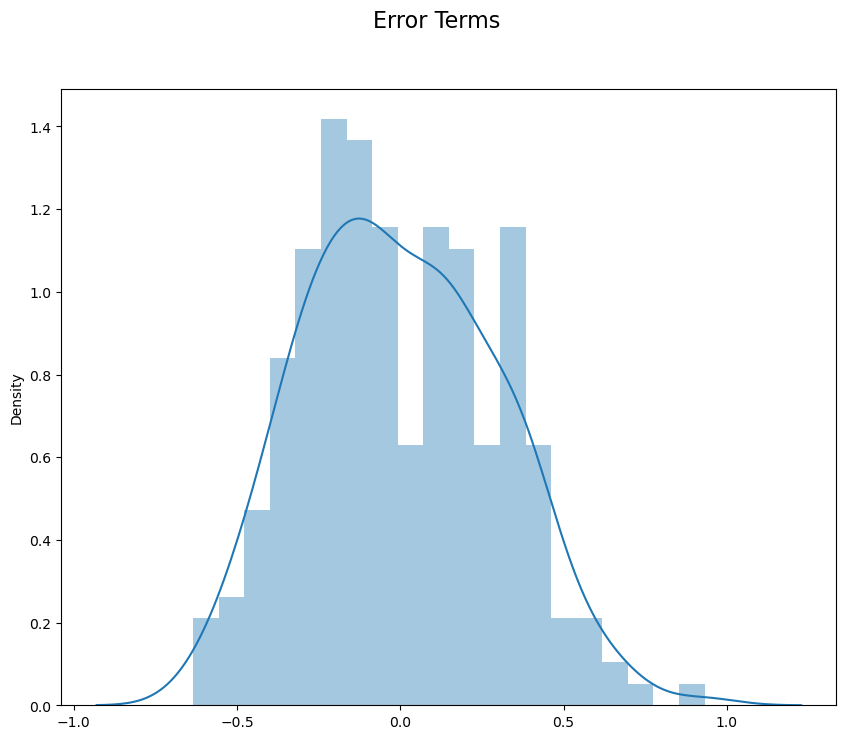

In [69]:
fig = plt.figure()
data_OLS_result = data_stat_model.OLS(y_t, X_cleana).fit()
y_predicted = data_OLS_result.predict(X_cleana)
sns.distplot((y_t - y_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)
plt.show()

In [83]:
#China Dataset
#Compute VIF data for each independent variable
data_ = clean_data.drop(['Corrosion rate'], axis=1)
y_data = clean_data['Corrosion rate']

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["features"] = clean_data.columns
vif["vif_Factor"] = [variance_inflation_factor(clean_data.values, i) for i in range(clean_data.shape[1])]
vif

,features,vif_Factor
0,Temperature,1.055158e+02
1,Flow velocity,5.499361e+01
2,CO2 pressure,6.734395e+09
3,Internal pressure,6.735321e+09
4,Shear stress,1.578695e+00
5,pH,2.482181e+03
6,Corrosion rate,2.899941e+02


In [84]:
import statsmodels.api as data_stat_model  
x_data = data_stat_model.add_constant(data_) 
data_OLS_result = data_stat_model.OLS(y_data, data_).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Corrosion rate   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              2505.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                    3.57e-62
Time:                        09:35:27   Log-Likelihood:                          20.637
No. Observations:                  58   AIC:                                     -29.27
Df Residuals:                      52   BIC:                                     -16.91
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [85]:
data_clean = data_.drop(['Flow velocity'], axis=1)

In [86]:
vif = pd.DataFrame()
vif["features"] = data_clean.columns
vif["vif_Factor"] = [variance_inflation_factor(data_clean.values, i) for i in range(data_clean.shape[1])]
vif

,features,vif_Factor
0,Temperature,5.285426e+01
1,CO2 pressure,6.688999e+09
2,Internal pressure,6.689839e+09
3,Shear stress,1.455018e+00
4,pH,2.043752e+03


In [87]:
import statsmodels.api as data_stat_model  
x_data = data_stat_model.add_constant(data_clean) 
data_OLS_result = data_stat_model.OLS(y_data, data_clean).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Corrosion rate   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              3052.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                    6.75e-64
Time:                        09:35:51   Log-Likelihood:                          20.526
No. Observations:                  58   AIC:                                     -31.05
Df Residuals:                      53   BIC:                                     -20.75
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [88]:
data_clean1 = data_clean.drop(['CO2 pressure', 'Internal pressure'], axis=1)

In [89]:
vif = pd.DataFrame()
vif["features"] = data_clean1.columns
vif["vif_Factor"] = [variance_inflation_factor(data_clean1.values, i) for i in range(data_clean1.shape[1])]
vif

,features,vif_Factor
0,Temperature,43.605446
1,Shear stress,1.415425
2,pH,45.732071


In [90]:
import statsmodels.api as data_stat_model  
x_data = data_stat_model.add_constant(data_clean1) 
data_OLS_result = data_stat_model.OLS(y_data, data_clean1).fit() 
data_OLS_result.params.sort_values(ascending=False) 
print(data_OLS_result.summary())

                                 OLS Regression Results                                
Dep. Variable:         Corrosion rate   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              5191.
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                    2.02e-67
Time:                        09:36:32   Log-Likelihood:                          20.047
No. Observations:                  58   AIC:                                     -34.09
Df Residuals:                      55   BIC:                                     -27.91
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

C:\Users\Mary\anaconda3\NewAnaconda\envs\pygdal1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


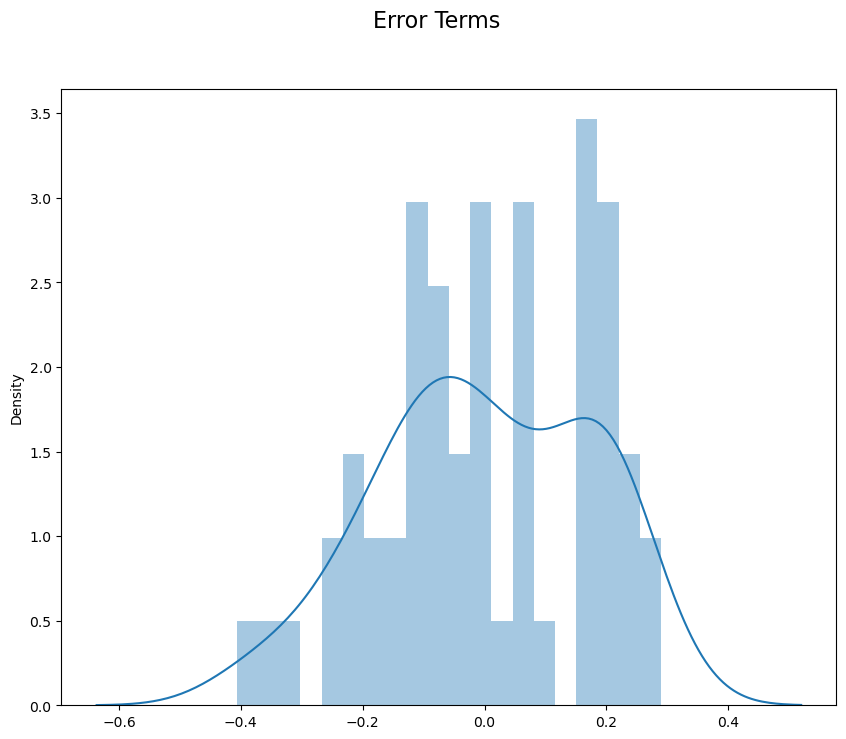

In [91]:
fig = plt.figure()
data_OLS_result = data_stat_model.OLS(y_data, data_clean1).fit()
y_predicted = data_OLS_result.predict(data_clean1)
sns.distplot((y_data - y_predicted), bins = 20)
fig.suptitle('Error Terms', fontsize = 16)
plt.show()

In [ ]:
#Will perform normalization for the china dataset to further transform the dataset to be uniform

# Feature Selection Using Extra Tree Regressor

In [79]:
#Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
x1 = X.drop('Corrosion rate',axis=1)
y1 = X['Corrosion rate']
model = ExtraTreesRegressor()
model.fit(x1,y1)
print(model.feature_importances_)

[0.26064156 0.00630484 0.20992197 0.00122422 0.33340472 0.00628739
 0.18221529]


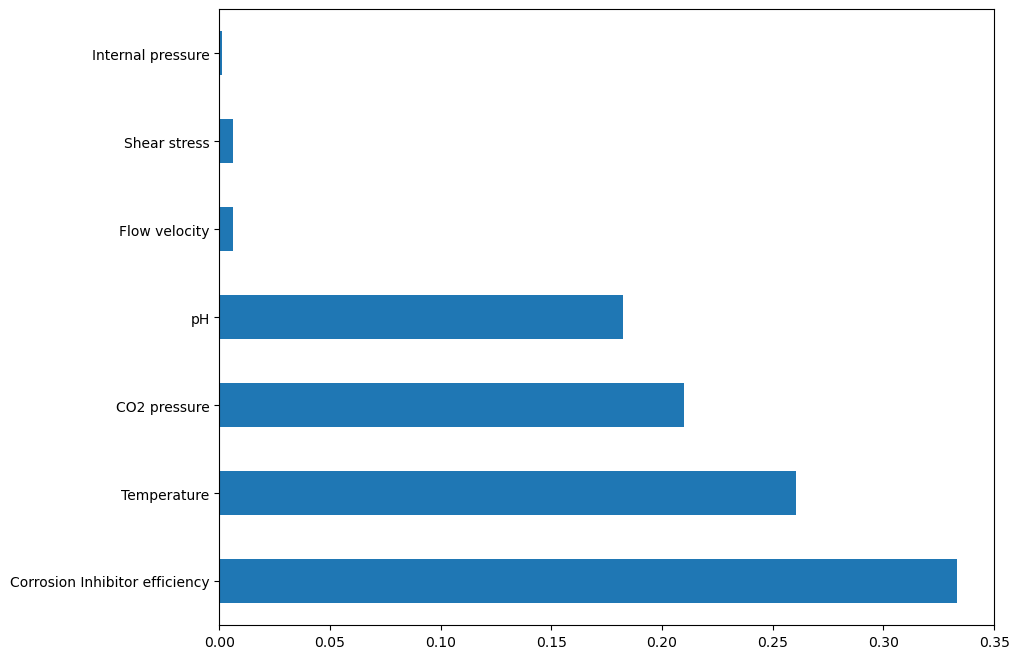

In [80]:
columns = ["Temperature","Flow velocity","CO2 pressure","Internal pressure","Corrosion Inhibitor efficiency","Shear stress","pH"]
feat_importances = pd.Series(model.feature_importances_,index=columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [81]:
x2 = clean_data.drop('Corrosion rate',axis=1)
y2 = clean_data['Corrosion rate']
model2 = ExtraTreesRegressor()
model2.fit(x2,y2)
print(model2.feature_importances_)

[0.35522576 0.06433497 0.19050918 0.16649967 0.13540723 0.08802319]


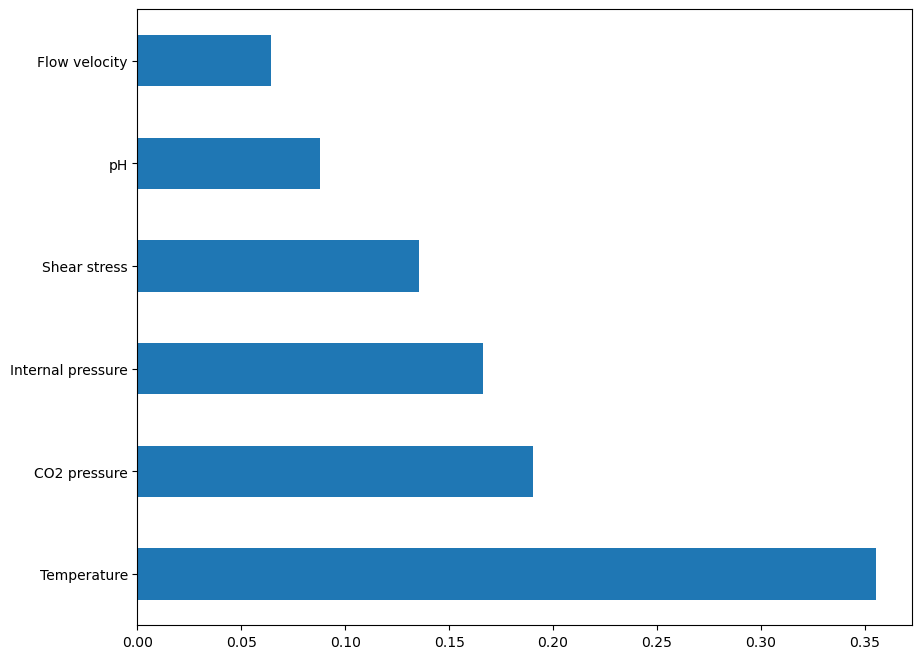

In [82]:
columns = ["Temperature","Flow velocity","CO2 pressure","Internal pressure","Shear stress","pH"]
feat_importances = pd.Series(model2.feature_importances_,index=columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

<Figure size 150000x150000 with 0 Axes>

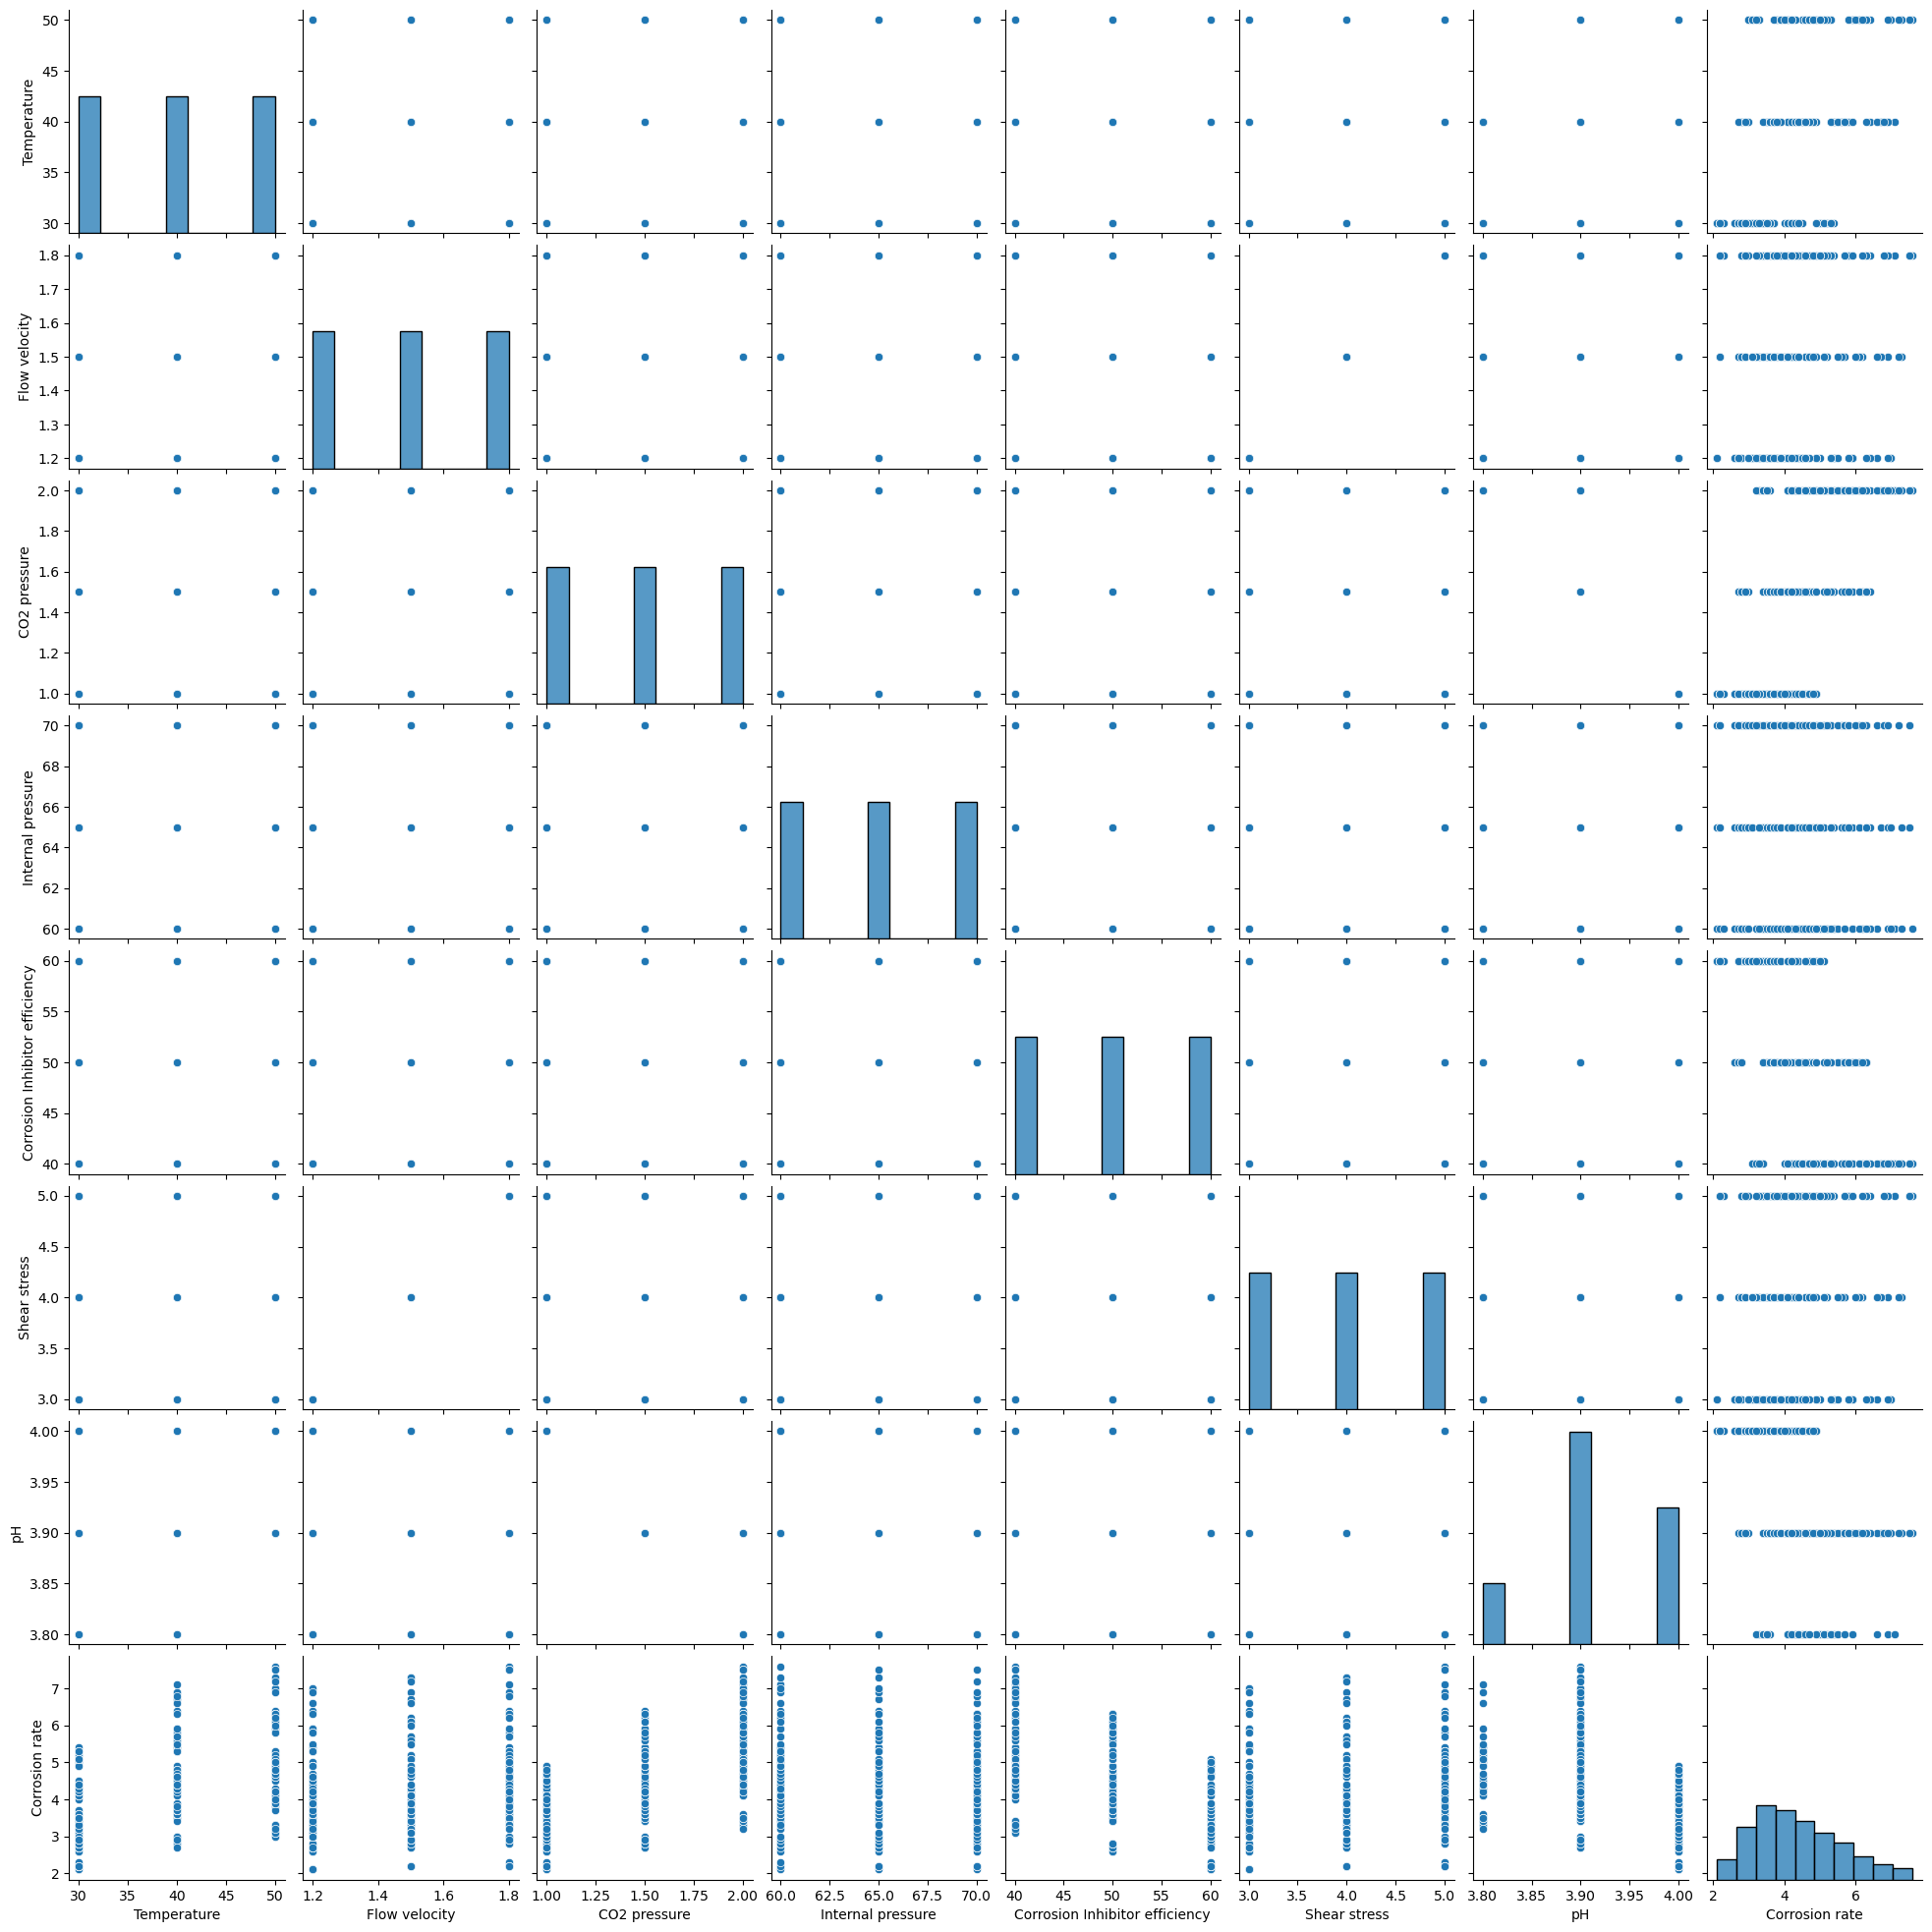

In [92]:
plt.figure(figsize = (1500,1500))
sns.pairplot(X)
plt.show()

<Figure size 150000x150000 with 0 Axes>

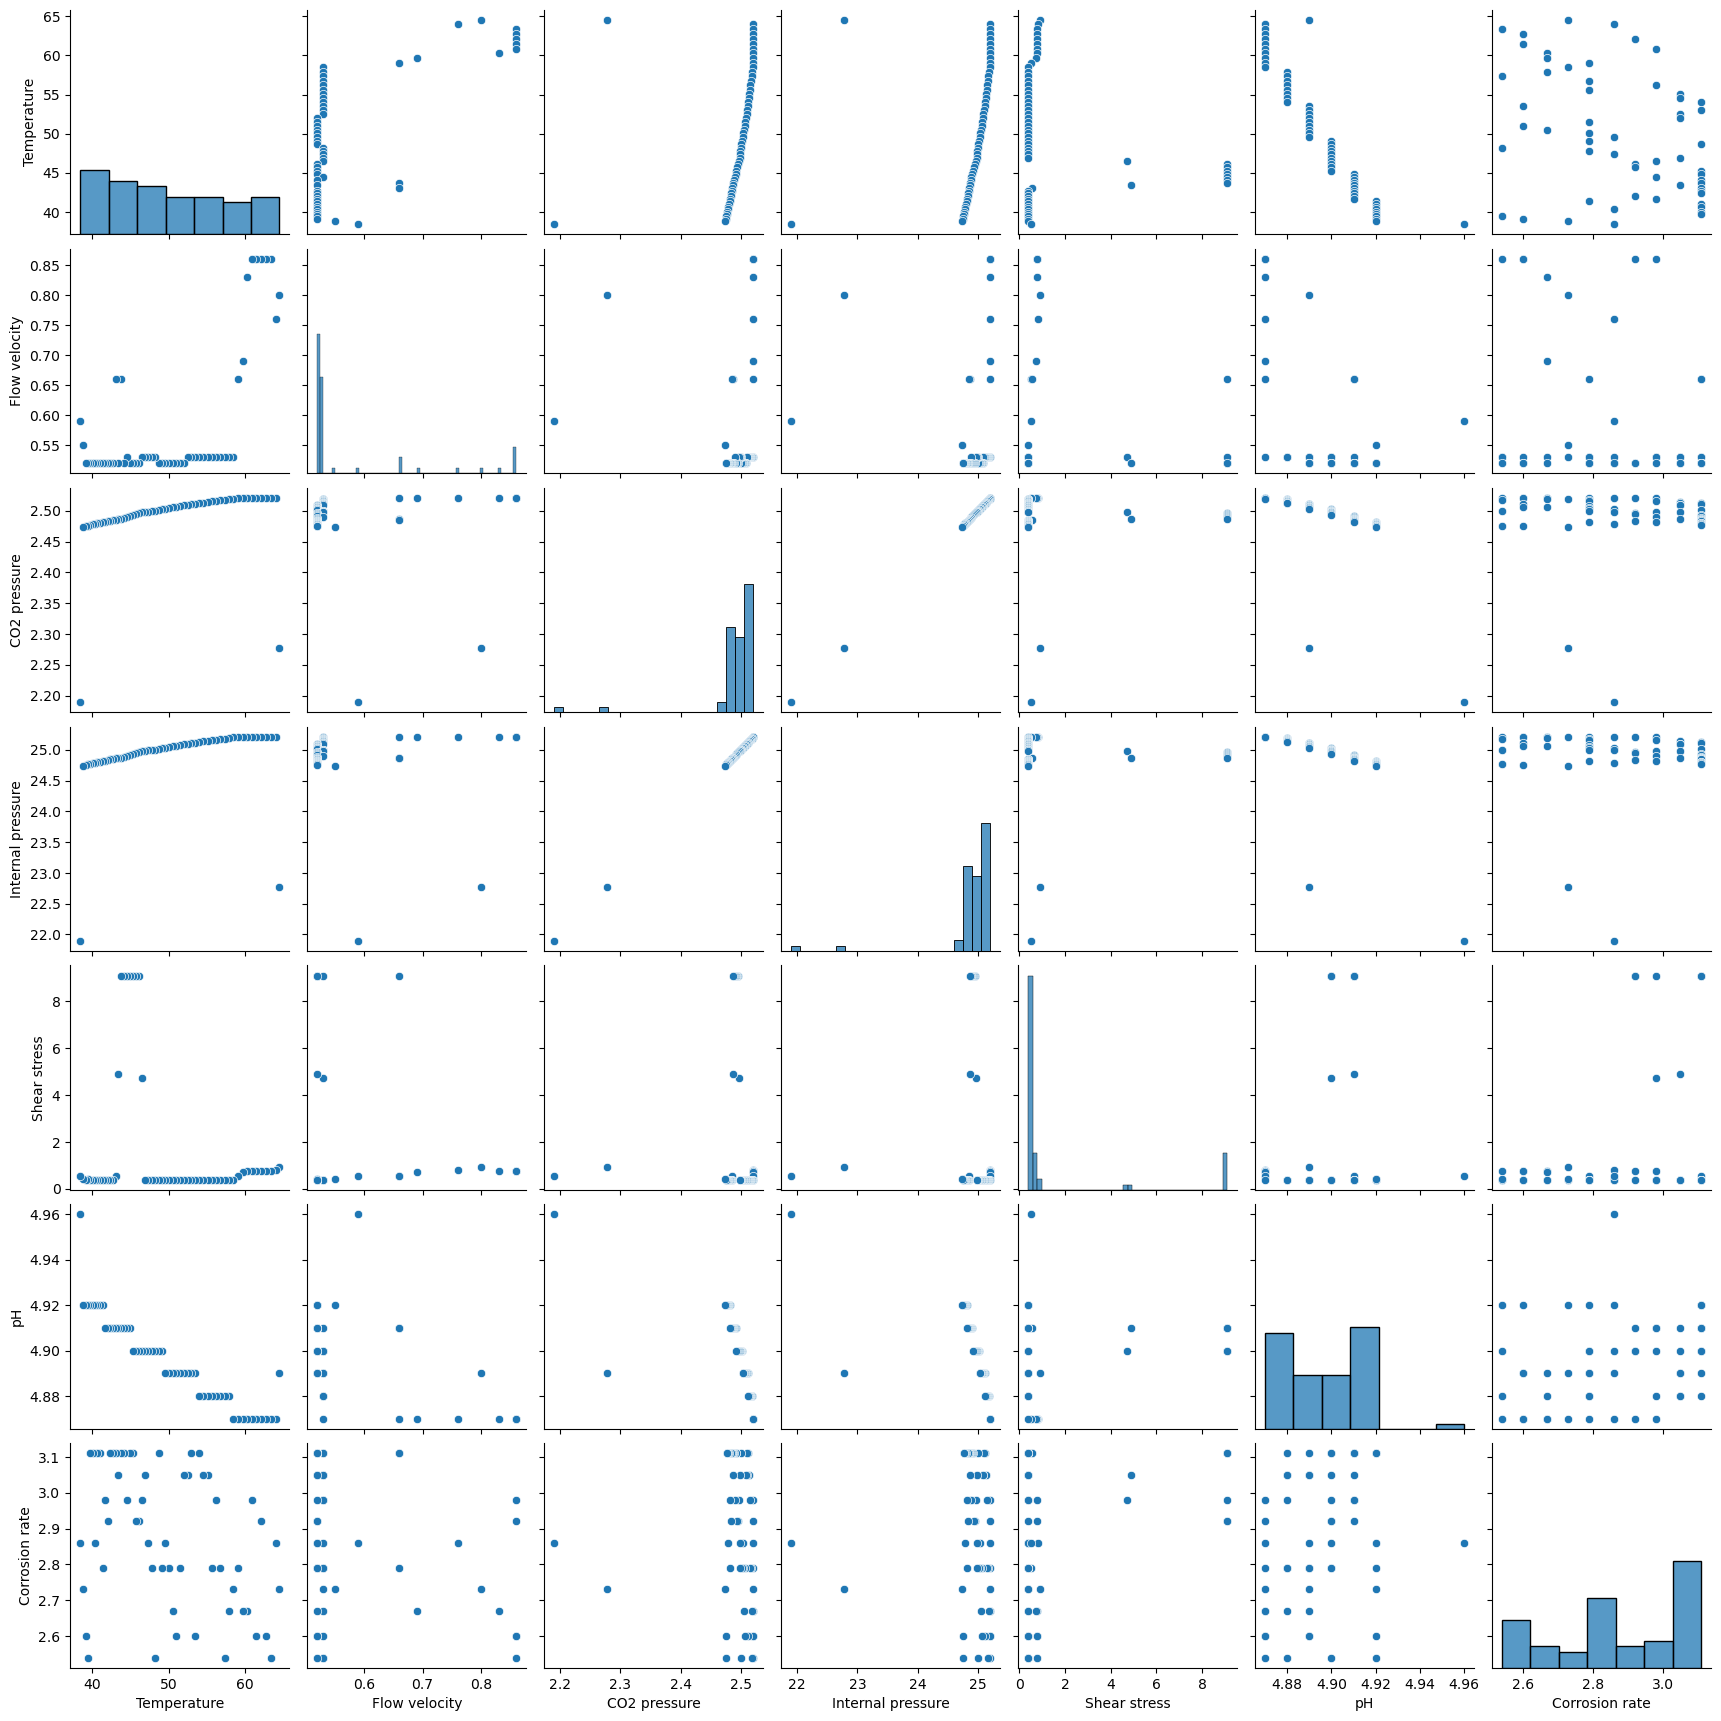

In [93]:
plt.figure(figsize = (1500,1500))
sns.pairplot(clean_data)
plt.show()

In [94]:
# split data
#Assign Dependent and Independent variable
#X_new = X.drop('Corrosion rate',axis=1)
y_new = X['Corrosion rate']

# Train DATASET Using Feature Selection

In [108]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) 
rescaledX = scaler.fit_transform(X_cleana) 
X_read =rescaledX

In [109]:
#split data into train and test dataset
X_train,X_test,y_train, y_test = train_test_split(X_read,y_new,test_size = 0.3 , random_state = 0 )

In [110]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
X_train,X_test,y_train, y_test = train_test_split(X_read,y_new,test_size = 0.3 , random_state = 0 )
models = []

models.append(('LR', LinearRegression()))
models.append(('R', Ridge()))
models.append(('L', Lasso()))
models.append(('BR', BayesianRidge(n_iter=1000)))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor(n_estimators=300)))
models.append(('BR', BaggingRegressor(n_estimators=300)))
models.append(('ETR', ExtraTreesRegressor(n_estimators=300)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=300)))
models.append(('RFR', RandomForestRegressor(n_estimators=300)))

for name, model in models:
    model.fit(X_train, y_train)
    m_predict = model.predict(X_test)
    model_scores1=cross_val_score(model,X_train,y_train,cv=15)
    m_score = r2_score(y_test, m_predict)
    print("%s: r2_score = %.3f" % (name, m_score))
    #print("%s: r2_score = %.3f" % (name, model_scores1))

LR: r2_score = 0.935
R: r2_score = 0.932
L: r2_score = -0.009
BR: r2_score = 0.935
KNR: r2_score = 0.945
DTR: r2_score = 0.976
SVR: r2_score = 0.975
ABR: r2_score = 0.947
BR: r2_score = 0.976
ETR: r2_score = 0.976
GBR: r2_score = 0.977
RFR: r2_score = 0.976


In [111]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

X_train, X_test, y_train, y_test = train_test_split(X_read,y_new, test_size = 0.20, random_state =7)

models = []
names = []
results = []

models.append(('LR', LinearRegression()))
models.append(('R', Ridge()))
models.append(('L', Lasso()))
models.append(('BR', BayesianRidge(n_iter=1000)))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor(n_estimators=300)))
models.append(('BR', BaggingRegressor(n_estimators=300)))
models.append(('ETR', ExtraTreesRegressor(n_estimators=300)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=300)))
models.append(('RFR', RandomForestRegressor(n_estimators=300)))

for name, model in models:
    model.fit(X_train, y_train)
    m_predict = model.predict(X_test)
    m_score = r2_score(y_test, m_predict)
    names.append(name)
    results.append(m_score)
    print("%s: r2_score = %.3f" % (name, m_score))
    print('MAE:',metrics.mean_absolute_error(y_test, m_predict))
    print('MSE:',metrics.mean_squared_error(y_test, m_predict))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, m_predict)))

LR: r2_score = 0.950
MAE: 0.2444539182684481
MSE: 0.08906004494425546
RMSE: 0.29842929639071203
R: r2_score = 0.946
MAE: 0.2597054473780419
MSE: 0.0969373827171185
RMSE: 0.3113476878300504
L: r2_score = -0.014
MAE: 1.0928887018725015
MSE: 1.81236668756141
RMSE: 1.3462416898764538
BR: r2_score = 0.950
MAE: 0.24506690878113926
MSE: 0.08922621743335821
RMSE: 0.29870757846656354
KNR: r2_score = 0.957
MAE: 0.19591836734693888
MSE: 0.07606530612244904
RMSE: 0.2757993947100846
DTR: r2_score = 0.979
MAE: 0.16542759961127307
MSE: 0.03703776030820491
RMSE: 0.19245196883431698
SVR: r2_score = 0.979
MAE: 0.1588007502996598
MSE: 0.03731085474720928
RMSE: 0.1931601789893799
ABR: r2_score = 0.939
MAE: 0.2705655771494049
MSE: 0.1089139408292728
RMSE: 0.3300211217926404
BR: r2_score = 0.983
MAE: 0.15293045904064828
MSE: 0.031157539202675288
RMSE: 0.17651498294103898
ETR: r2_score = 0.979
MAE: 0.16542759961127157
MSE: 0.037037760308203584
RMSE: 0.19245196883431354
GBR: r2_score = 0.980
MAE: 0.1641318945

# Training Dataset Using PCA

In [106]:
#Model Development B - PCA Select Best Features

from numpy import array
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(5)
# fit on data
pca.fit(X_)
# access values and vectors
print("pca_components\n")
print(pca.components_)
print("pca_explained_variance\n")
print(pca.explained_variance_ratio_)
# transform data
B = pca.transform(X_)
print(B)

X_train, X_test, y_train, y_test = train_test_split(B, y_new, test_size = 0.20, random_state =7)

models = []
names = []
results = []

models.append(('LR', LinearRegression()))
models.append(('R', Ridge()))
models.append(('L', Lasso()))
models.append(('BR', BayesianRidge(n_iter=1000)))
models.append(('KNR', KNeighborsRegressor()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('ABR', AdaBoostRegressor(n_estimators=300)))
models.append(('BR', BaggingRegressor(n_estimators=300)))
models.append(('ETR', ExtraTreesRegressor(n_estimators=300)))
models.append(('GBR', GradientBoostingRegressor(n_estimators=300)))
models.append(('RFR', RandomForestRegressor(n_estimators=300)))

for name, model in models:
    model.fit(X_train, y_train)
    m_predict = model.predict(X_test)
    m_score = r2_score(y_test, m_predict)
    names.append(name)
    results.append(m_score)
    print("%s: r2_score = %.3f" % (name, m_score))
    print('MAE:',metrics.mean_absolute_error(y_test, m_predict))
    print('MSE:',metrics.mean_squared_error(y_test, m_predict))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, m_predict)))

pca_components

[[-9.99998611e-01 -7.40195423e-19  6.03396674e-07 -6.17320645e-07
   7.80494630e-22 -2.45304923e-21 -1.66677191e-03]
 [-4.19376514e-18  2.98333451e-18  3.63966757e-16 -3.23788593e-18
  -1.00000000e+00  7.70373139e-18  2.52125043e-15]
 [ 2.46976353e-06  1.14326662e-17  1.62155922e-06 -9.99999382e-01
  -1.10481021e-22  6.71589865e-18 -1.11139313e-03]
 [ 2.64528463e-19 -2.87347886e-01  5.32557196e-16 -9.70486698e-18
  -7.21525571e-18 -9.57826285e-01 -5.55111512e-17]
 [ 2.39966234e-04  1.86023532e-16  9.89633993e-01  1.61215106e-04
  -7.02078643e-19  5.01111361e-16 -1.43612246e-01]]
pca_explained_variance

[0.44180134 0.44180011 0.11045016 0.00481562 0.00112765]
[[ 9.99985308e+00  1.00000000e+01  4.99988085e+00  1.04403065e+00
  -5.09724473e-01]
 [ 9.99985308e+00  7.29801910e-17  4.99988085e+00  1.04403065e+00
  -5.09724473e-01]
 [ 9.99985308e+00 -1.00000000e+01  4.99988085e+00  1.04403065e+00
  -5.09724473e-01]
 ...
 [-9.99995803e+00  1.00000000e+01 -4.99995082e+00 -1.0440

# Model Optimization - Hyper parameter Tuning

In [107]:
#the best model is selected for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [114]:
#Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
model = grid_search.fit(X_train,y_train)
print(model.best_params_,'\n')
print(model.best_estimator_,'\n')

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
{'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100} 

RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8) 



In [115]:
#define cross-validation method to use
from numpy import mean
from numpy import absolute
from numpy import sqrt
cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build multiple linear regression model
model = RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)

#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print(mean(absolute(scores)))

#view RMSE
print(sqrt(mean(absolute(scores))))


0.1672844003293583
0.40900415686073205


In [116]:
m_score = r2_score(y_test, m_predict)
m_score

0.9826167996172477

In [117]:
#Choose the best model
RFR=RandomForestRegressor(bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)

RFR.fit(X_train, y_train)

y_pred = RFR.predict(X_test)

In [118]:
y_validation = y_test.reset_index(drop=True)
y_pred_df = pd.DataFrame({'Corrosion_rate_predict': y_pred.flatten()})

In [119]:
#Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison= pd.merge(y_validation, y_pred_df, left_index=True, right_index=True)
Comparison.head(10)

,Corrosion rate,Corrosion_rate_predict
0,3.5,3.396167
1,6.7,6.737293
2,3.1,3.280170
3,5.8,5.875791
4,5.8,6.085860
5,4.9,4.663467
6,4.5,4.663467
7,3.4,3.699018
8,5.6,5.643422
9,3.4,3.396167


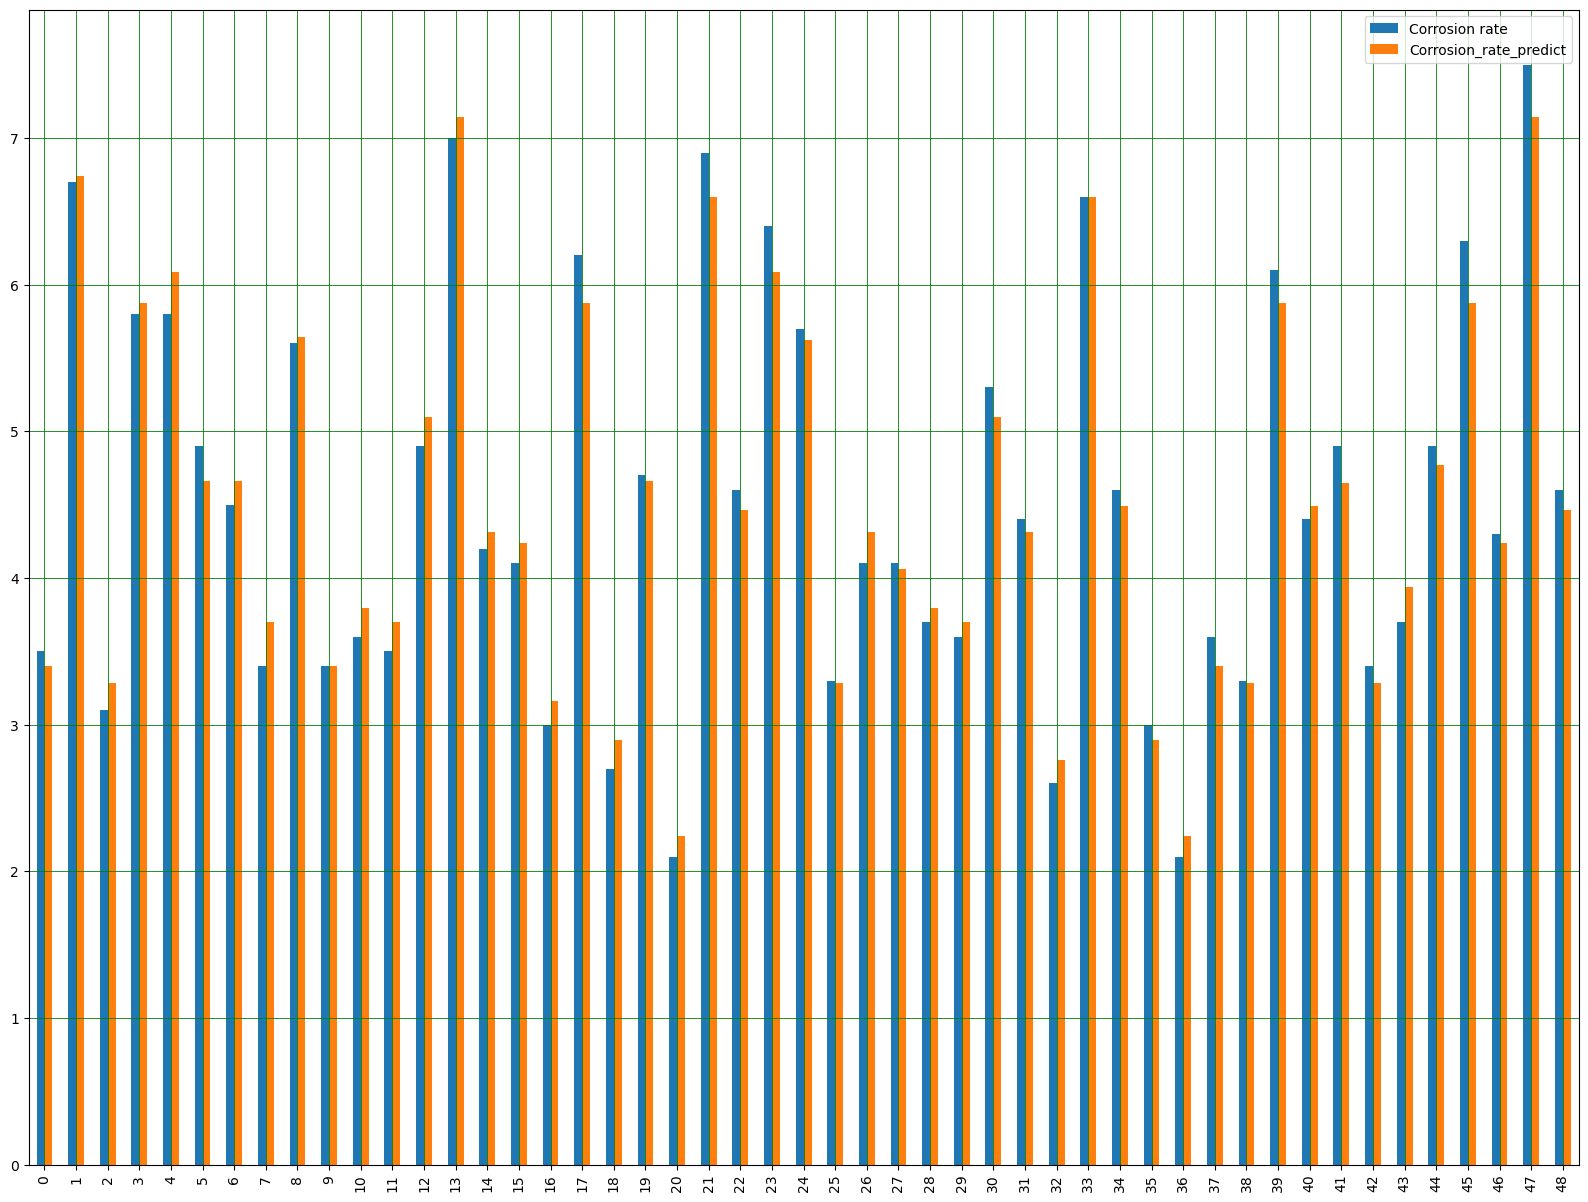

In [120]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
bmw_pred = plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

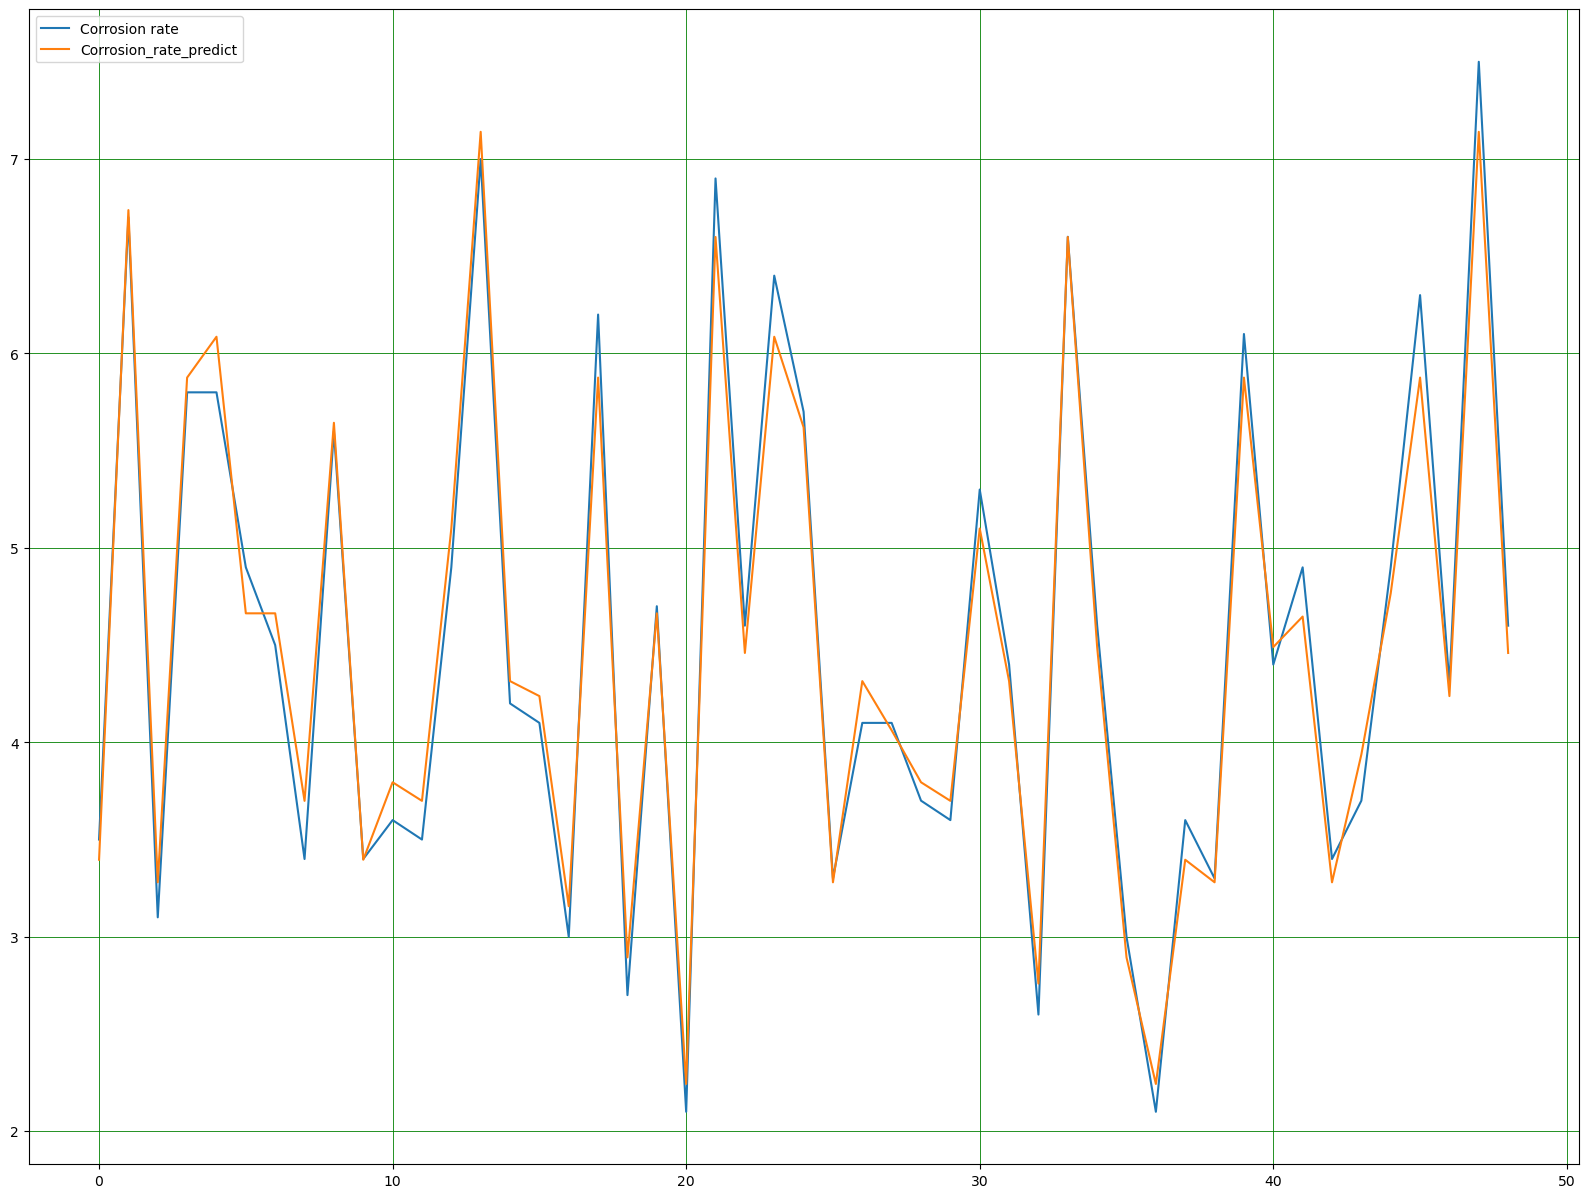

In [121]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'line', figsize = (20,15))
bmw_pred = plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()

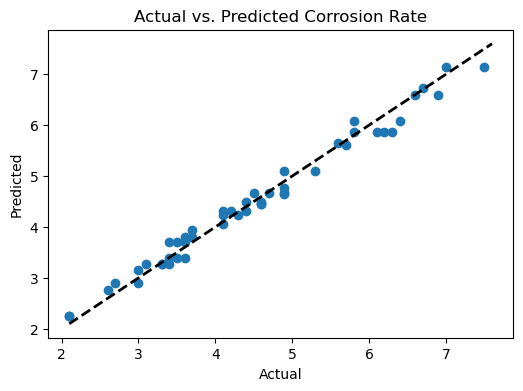

In [125]:
# Plot the actual vs. predicted values
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(y_validation, y_pred_df)
ax.plot([y_new.min(), y_new.max()], [y_new.min(), y_new.max()], "k--", lw=2)
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.set_title("Actual vs. Predicted Corrosion Rate")
plt.show()